# **Detecting the anomalous activity of a ship’s engine**

This project focuses on identifying anomalous activities in the operation of a ship's engine (Devabrat, 2022). A key consideration is that anomalies typically constitute a minority of data points (i.e., between 1% and 5% of data points would be anomalies).

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

The project goal is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. This will be done following the pipeline detailed below:
- Explore the data set
- Preprocess the data and conduct feature engineering
- Apply statistical techniques to detect anomalies
- Use ML algorithms to detect anomalies.
- Compare results to identify the best-performing models.


# Model solution

In this business scenario, we are required to analyse a data set to identify potential anomalies and build several predictive models to detect them effectively. The aim is to evaluate the performance of each model, determine how parameter tuning influences the results, and compare their outputs to select the most appropriate method.

Before fitting any model, it is necessary to conduct exploratory descriptive analysis (EDA) to understand the characteristics and structure of the data set. This also provides initial insights regarding the existence of outliers and how they affect each feature.

## 1. Exploratory Descriptive Analysis (EDA)

We begin by importing the data set and some necessary libraries.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# URL to import data set from GitHub.
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'

# Create data frame
df = pd.read_csv(url)
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [2]:
# Print number of rows and columns of the data frame
print(df.shape)

(19535, 6)


The data set contains 6 features from 19,535 observations. We can determine the type of each feature and whether any of them contains missing values.

In [3]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


As we can see, every feature is numerical and none of them contains missing values, so no imputation method is required.

### 1.1. Statistics summary

Next, we can analyse a statistical summary of the data set. This will provide information about the range of values, means, standard deviations, and quartiles of each feature, offering inisghts about the distribution of the data. We can include a parameter in the attribute `.describe()` to also include the 95th percentiles. Just to clarify, the median corresponds to the 50th percentile.

In [4]:
# View statistics summary
df.describe(percentiles=[0.25, 0.75, 0.95])

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
95%,1324.000000,5.058040,12.208475,4.438415,84.940778,88.612891
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


Some findings can be highlighted from the statistical summary:

* There is considerable variability in Engine rpm values -- the minimum is 61 while the maximum is 2,239. This might be an indicator of potential anomalies within the feature, since the mean is $\mu=791.24$ and the standard deviation is $\sigma=267.61$.

* The metrics of lubrication oil temperature and coolant temperature are really similar, but there is significant difference in their maximum values -- 89.58 for the former, while 195.53 for the latter. This might suggest the existence of anomalies in the coolant temperature feature.

It is necessary to clarify that there is not enough evidence to claim these insights as true, so further analysis is required in other to confirm our suspicions and find additional anomalies.

### 1.2. Data visualisation

Once we have analysed the statistics of the data set, we can now visualise some plots to understand the distribution of the features and confirm the existence of outliers. We will start by plotting box-plots, which, besides showing how data is distributed through the quartiles and the interquartile range (IQR), they can also be helpful to identify outliers.

In [5]:
def plot_boxplots(df, figsize, n_rows, n_cols):
  '''Given the data set, the size of the plots, and the number of rows and
  columns to show the output, plot the boxplots for each feature'''

  # Create boxplots
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

  for i, feature in enumerate(df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} boxplot')

  # Show the plots
  plt.tight_layout()
  plt.show()

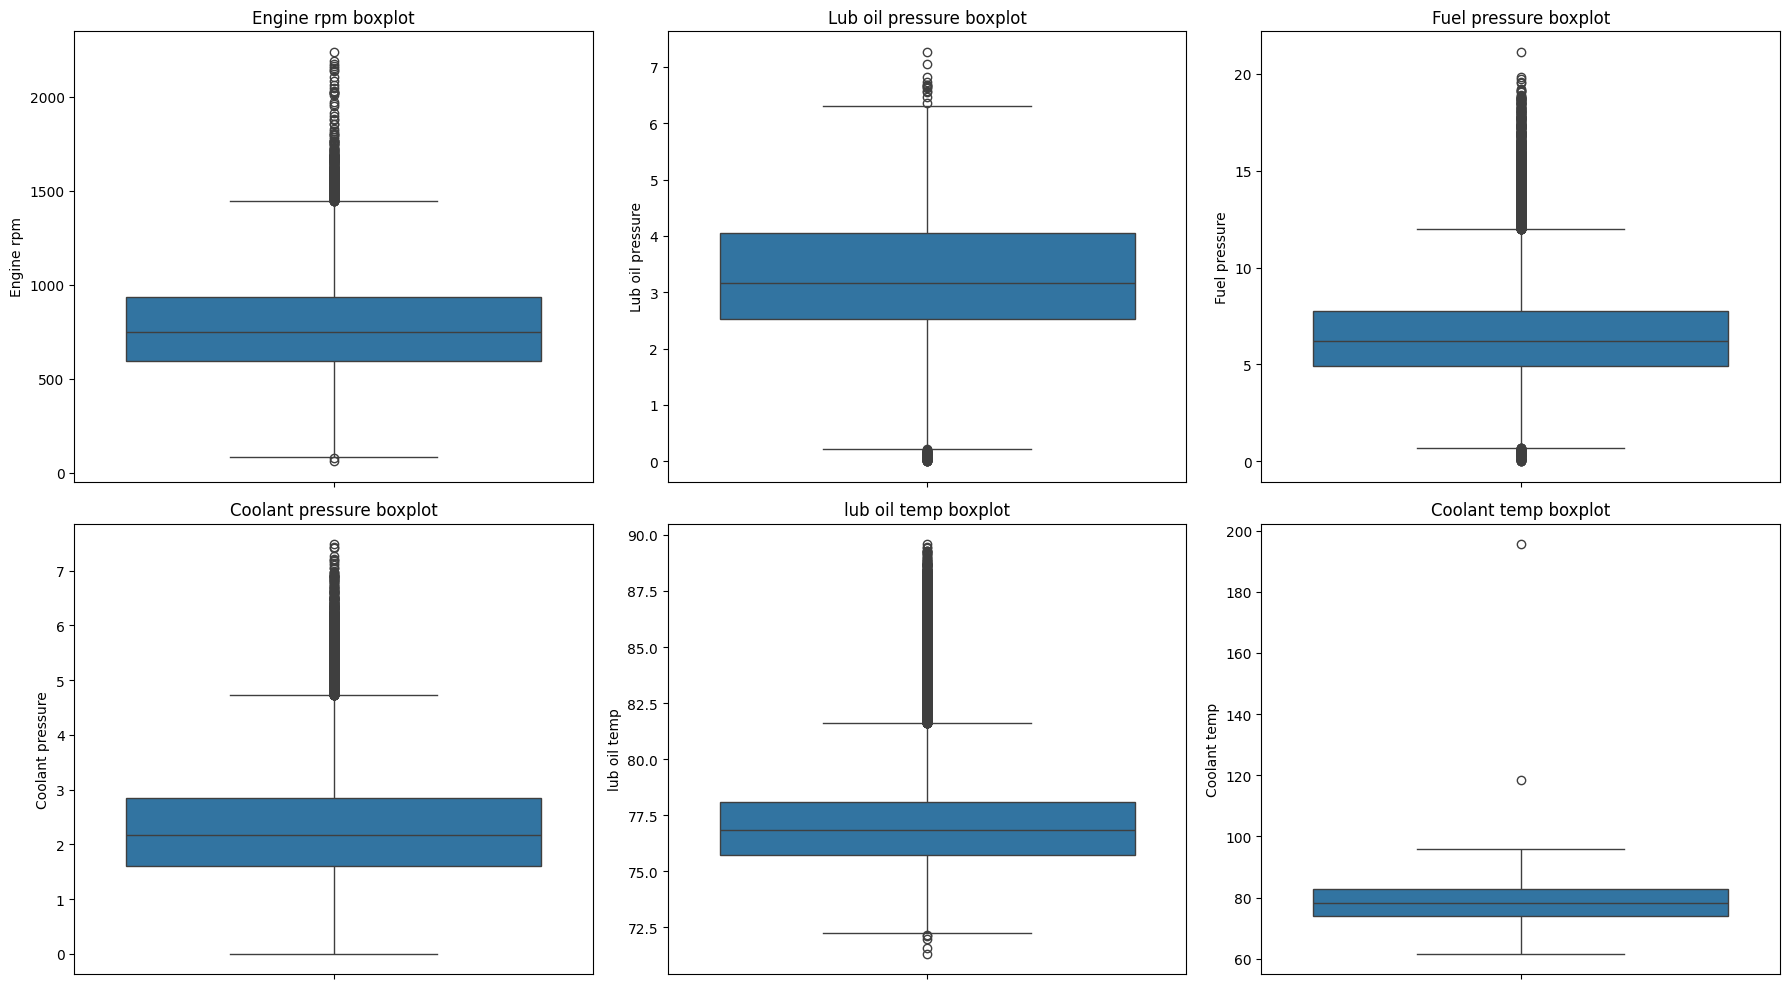

In [6]:
plot_boxplots(df, figsize=(18, 10), n_rows=2, n_cols=3)

The plots align with our previous findings. All the features have outliers, most of them being extremely high values. `Engine rpm`, `Fuel pressure`, `Coolant pressure` and `Lub oil temperature` have a significant number of outliers, whereas `Lub oil pressure` and `Coolant temperature` present a reduced number of them.

Feature distribution is a key assumption for most of the statistical anomaly detection methods. Some of them assume the data to be normally distributed, while others can only be applied if this assumption is not satisfied, or if the data is skewed with extreme observations.

Histograms provide a visualisation of each feature's distribution.

In [7]:
def plot_histograms(df, figsize, n_rows, n_cols):
  '''Given the data set, the size of the plots, and the number of rows and
  columns to show the output, plot the histograms for each feature'''

  # Create histograms
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

  for i, feature in enumerate(df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data=df[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'{feature} histogram')

  # Show the plots
  plt.tight_layout()
  plt.show()

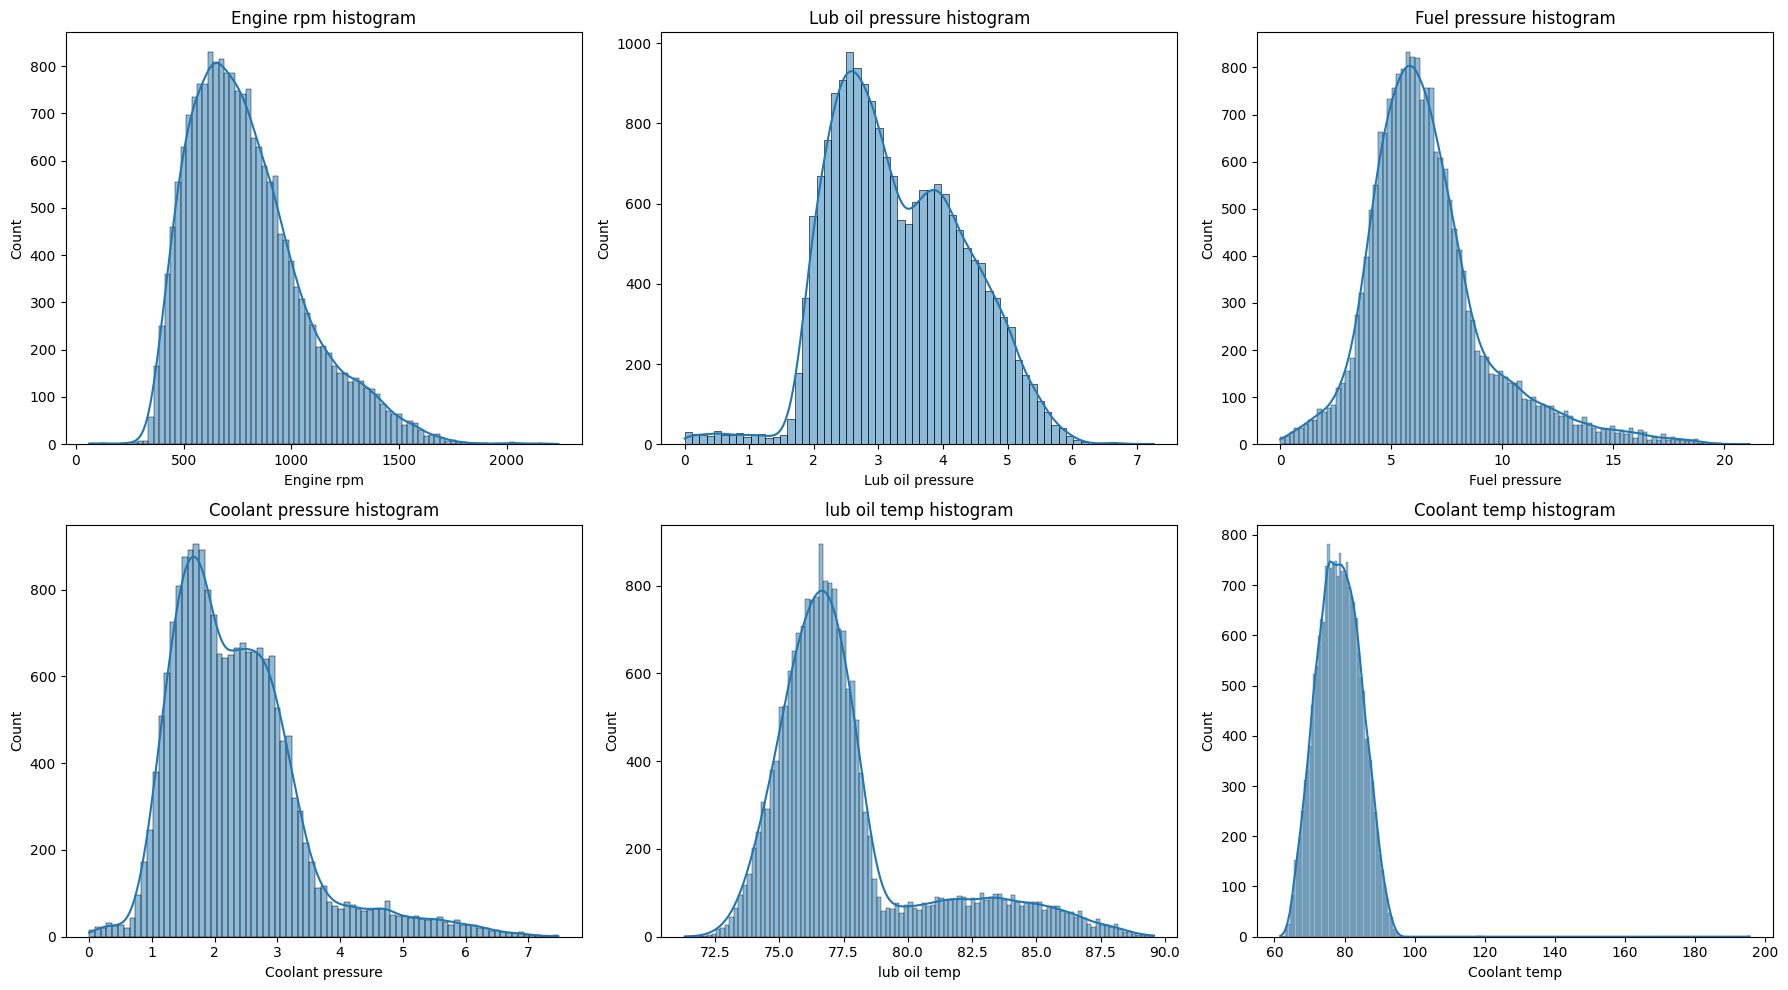

In [8]:
plot_histograms(df, figsize=(18, 10), n_rows=2, n_cols=3)

The plots suggest that all features are not normally distributed -- in particular, most of them seem to be right-skewed.

Visualisation provided significant insights regarding the data distribution. Boxplots identified a considerable amount of anomalies in each feature, highlighting the necessity of performing anomaly detection mehods in order to efficiently identify them. Additionally, histograms confirmed that the data does not follow a normal distribution, suggesting that outliers may skew the data.

The next step is to apply different anomaly detection methods.

## 2. Anomaly detection methods

We will perform both statistical and ML-based methods. We begin by performing the interquartile range (IQR) method.

### 2.1. IQR

The IQR method is a non-parametric statistical method for anomaly detection which is robust for non-normal distribution and skewed data with extreme observations.

The interquartile range IQR is defined as

$$ IQR = Q_3 - Q_1,$$

where $Q_3$ is the 75th percentile while $Q_1$ being the 25th percentile. Then, the method labels observations as anomalies if they fall outside the following interval
$$[Q_1 - 1.5IQR, Q_3+ 1.5IQR]$$

To record our findings and assess the effectiveness of the model, we will add a new binary column for each feature indicating if the observation was labelled as anomaly by the method (1) or not (0).

In [9]:
def iqr_method(df, column):
  '''Performs the IQR method and adds a new binary column for each feature
   indicating whether the observation is an anomaly (1) or not (0)'''

  df_copy = df.copy()

  # Define 25th and 75th percentiles
  q1 = df_copy[column].quantile(0.25)
  q3 = df_copy[column].quantile(0.75)

  # Calculate IQR
  iqr = q3 - q1

  # Define lower and upper bounds
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Check anomalies
  is_anomaly = (df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)

  # Add binary column to the dataset
  df_copy[f'{column} anomaly'] = is_anomaly.astype(int)

  return df_copy

In [10]:
# Create copy of the data set
df_copy = df.copy()

# Perform IQR method for each column
for feature in df_copy.columns:
  df_copy = iqr_method(df_copy, feature)

# Check data set
df_copy.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm anomaly,Lub oil pressure anomaly,Fuel pressure anomaly,Coolant pressure anomaly,lub oil temp anomaly,Coolant temp anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0


Let's now see how many anomalies have been detected in each column.

In [11]:
# Define binary columns
binary_cols = [col for col in df_copy.columns if 'anomaly' in col]

# List of results
results = []

# For each coulmn, calculate the number of anomalies and print it
for col in binary_cols:
  num_anomalies = df_copy[col].sum()
  results.append({'Feature': col, 'Anomalies': num_anomalies})

# Create the DataFrame
feature_anomalies_df = pd.DataFrame(results)
print(feature_anomalies_df)

                    Feature  Anomalies
0        Engine rpm anomaly        464
1  Lub oil pressure anomaly         66
2     Fuel pressure anomaly       1135
3  Coolant pressure anomaly        785
4      lub oil temp anomaly       2617
5      Coolant temp anomaly          2


/tmp/ipython-input-2489280279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=feature_anomalies_df, x="Anomalies", y="Feature", palette="Reds_r")


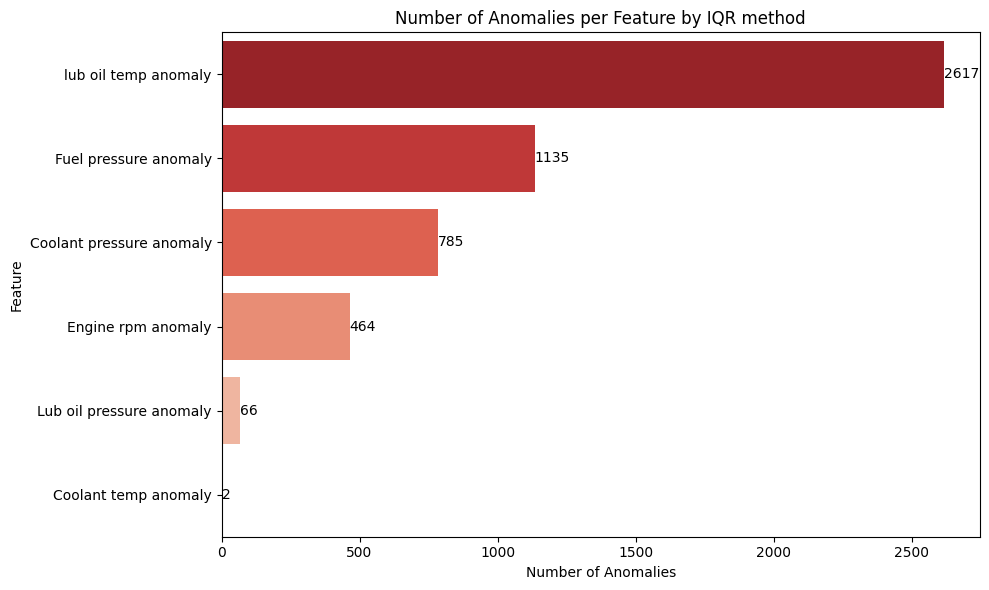

In [12]:
# Sort the data for better visualization
feature_anomalies_df = feature_anomalies_df.sort_values(by="Anomalies", ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=feature_anomalies_df, x="Anomalies", y="Feature", palette="Reds_r")

# Add labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.title("Number of Anomalies per Feature by IQR method")
plt.xlabel("Number of Anomalies")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

As we can see, the number of anomalies differs significantly between the columns. Lubricant oil temperature and fuel pressure contain more than 1,000 anomalies while coolant temperature only cointains 2. This suggests that the process of data collection in some features should be revised.

IQR method only provides the anomalies in each individual feature, but does not consider global anomalies. Then, we can set a threshold to decide whether an observation is an anomaly or not. In this case, if an observation is anomaly for a fixed number of features, it will be considered as a global anomaly. We can vary this fixed number and compare the number of anomalies that each approach provides.

In [13]:
def check_anomalies(df, binary_cols, n):
  '''Sums the values of the binary columns. Adds a new column indicating
   whether the observation is an anomaly for a fixed number of features (1) or not
    (0)'''

  df_copy = df.copy()

  # Sum the values of the binary columns
  sum_anomalies = df_copy[binary_cols].sum(axis=1)

  # Check anomalies
  is_anomaly = sum_anomalies >= n

  # Add binary column to the dataset
  df_copy['IQR anomaly'] = is_anomaly.astype(int)

  return df_copy

Let's start setting this fixed number to 1.

In [14]:
# Identify overall anomalies
df_iqr_copy = check_anomalies(df_copy, binary_cols, 1)

# Check data set
df_iqr_copy.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm anomaly,Lub oil pressure anomaly,Fuel pressure anomaly,Coolant pressure anomaly,lub oil temp anomaly,Coolant temp anomaly,IQR anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0


Now, let's calculate the number of anomalies that the method detected and the proportion out of the total number of observations in the data set.

In [15]:
# Calculate number of anomalies
num_anomalies = df_iqr_copy['IQR anomaly'].sum()
print(num_anomalies)

4636


In [16]:
# Anomaly ratio
anomaly_ratio = num_anomalies / len(df)
print(f'{anomaly_ratio*100:.2f}%')

23.73%


From the total 19,535 observations, 4636, i.e., the 23.73%, have been identified as anomalies by the IQR method. For a suitable approach, the number of anomalies should be between the 1% and 5% of the number of total observations. Therefore, this approach may not be the most indicate.

Next, let's try setting the fixed number to 2.

In [17]:
# Identify overall anomalies
df_copy = check_anomalies(df_copy, binary_cols, 2)

# Check data set
df_copy.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm anomaly,Lub oil pressure anomaly,Fuel pressure anomaly,Coolant pressure anomaly,lub oil temp anomaly,Coolant temp anomaly,IQR anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0


Now, we can calculate the anomaly ratio.

In [18]:
# Calculate number of anomalies
num_anomalies = df_copy['IQR anomaly'].sum()
print(num_anomalies)

422


In [19]:
# Anomaly ratio
anomaly_ratio = num_anomalies / len(df)
print(f'{anomaly_ratio*100:.2f}%')

2.16%


In this case, the anomaly ratio has dropped to a 2.16%, which is between 1% and 5%. This indicates that this approach is much more appropriate than the previous one.

Finally, let's set the fixed number to 3 and calculate the anomaly ratio.

In [20]:
# Identify overall anomalies
df_iqr_copy = check_anomalies(df_copy, binary_cols, 3)

# Check data set
df_iqr_copy.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm anomaly,Lub oil pressure anomaly,Fuel pressure anomaly,Coolant pressure anomaly,lub oil temp anomaly,Coolant temp anomaly,IQR anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0


In [21]:
# Calculate number of anomalies
num_anomalies = df_iqr_copy['IQR anomaly'].sum()
print(num_anomalies)

11


In [22]:
# Anomaly ratio
anomaly_ratio = num_anomalies / len(df)
print(f'{anomaly_ratio*100:.2f}%')

0.06%


In this case, the ratio has dropped to a 0.06%. This indicates that the best approach is to select anomalies for two or more features.

Once we have selected the best aproach, we can visualise the distribution of the normal observations. This can help us to understand the impact of outliers within the data. First, define the normal distributions.

In [23]:
# Store normal observations
iqr_normal_observations = df[df_copy['IQR anomaly'] == 0]

# Print dimensions
print(iqr_normal_observations.shape)

(19113, 6)


Next, plot the boxplots.

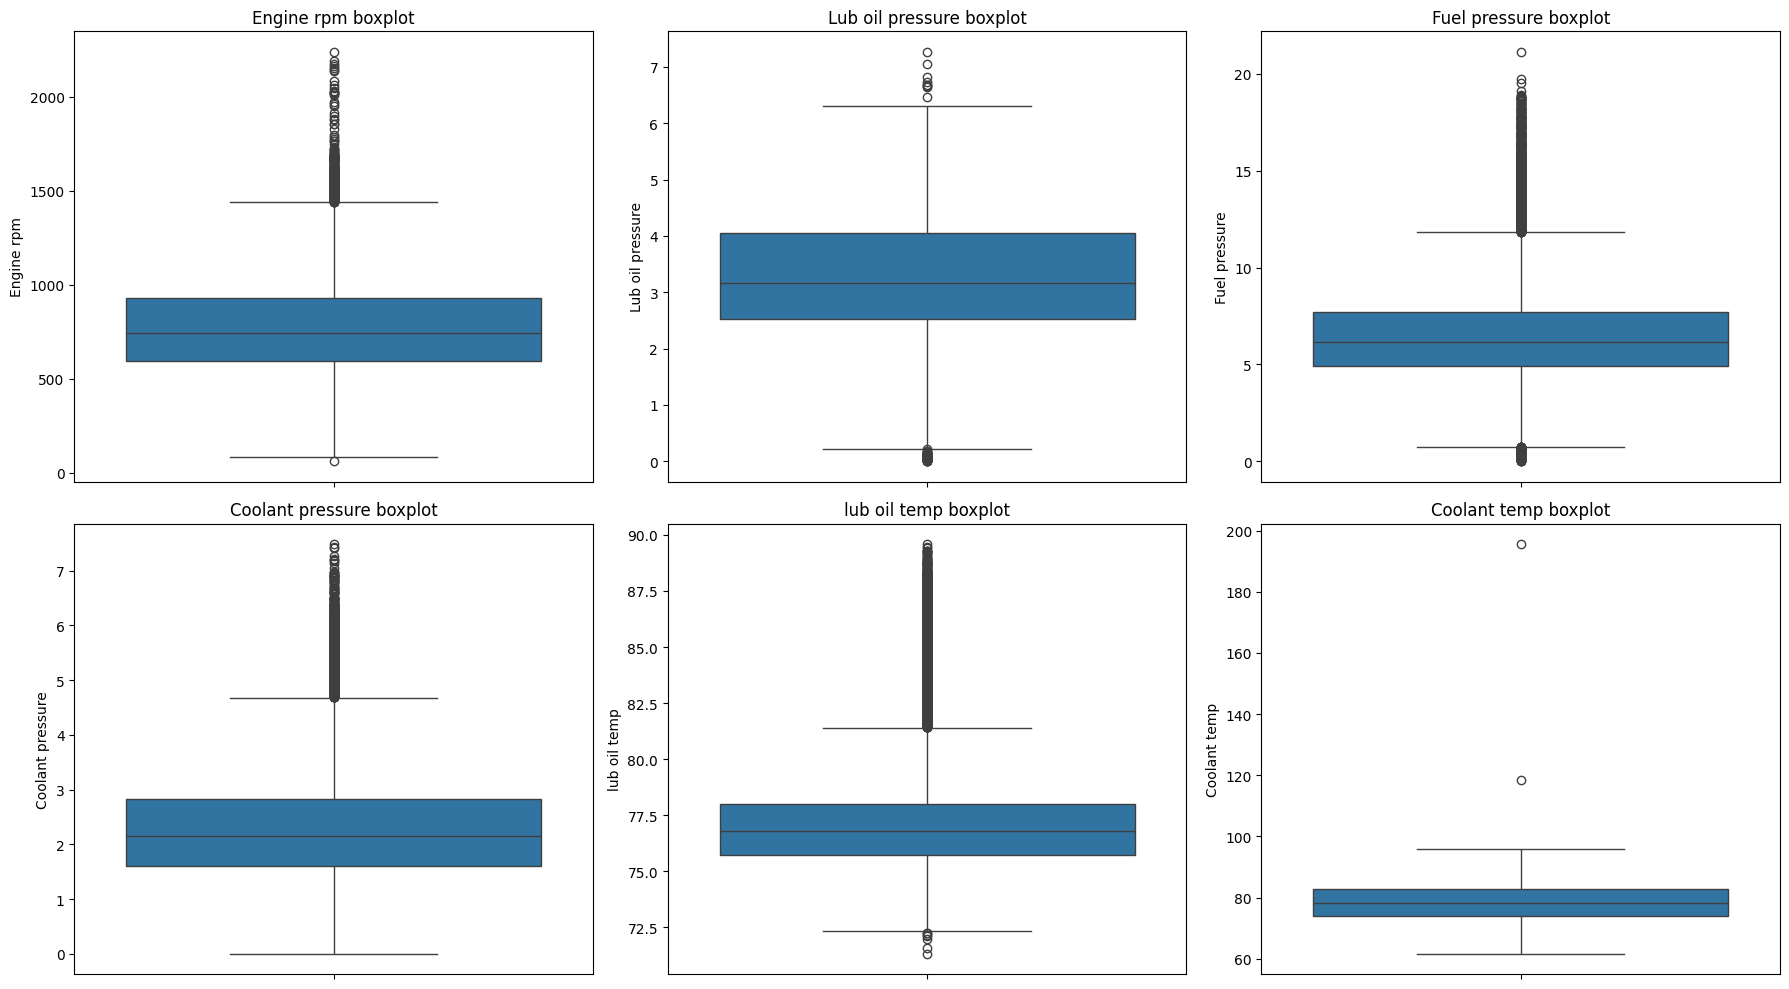

In [24]:
plot_boxplots(iqr_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

Now the histograms.

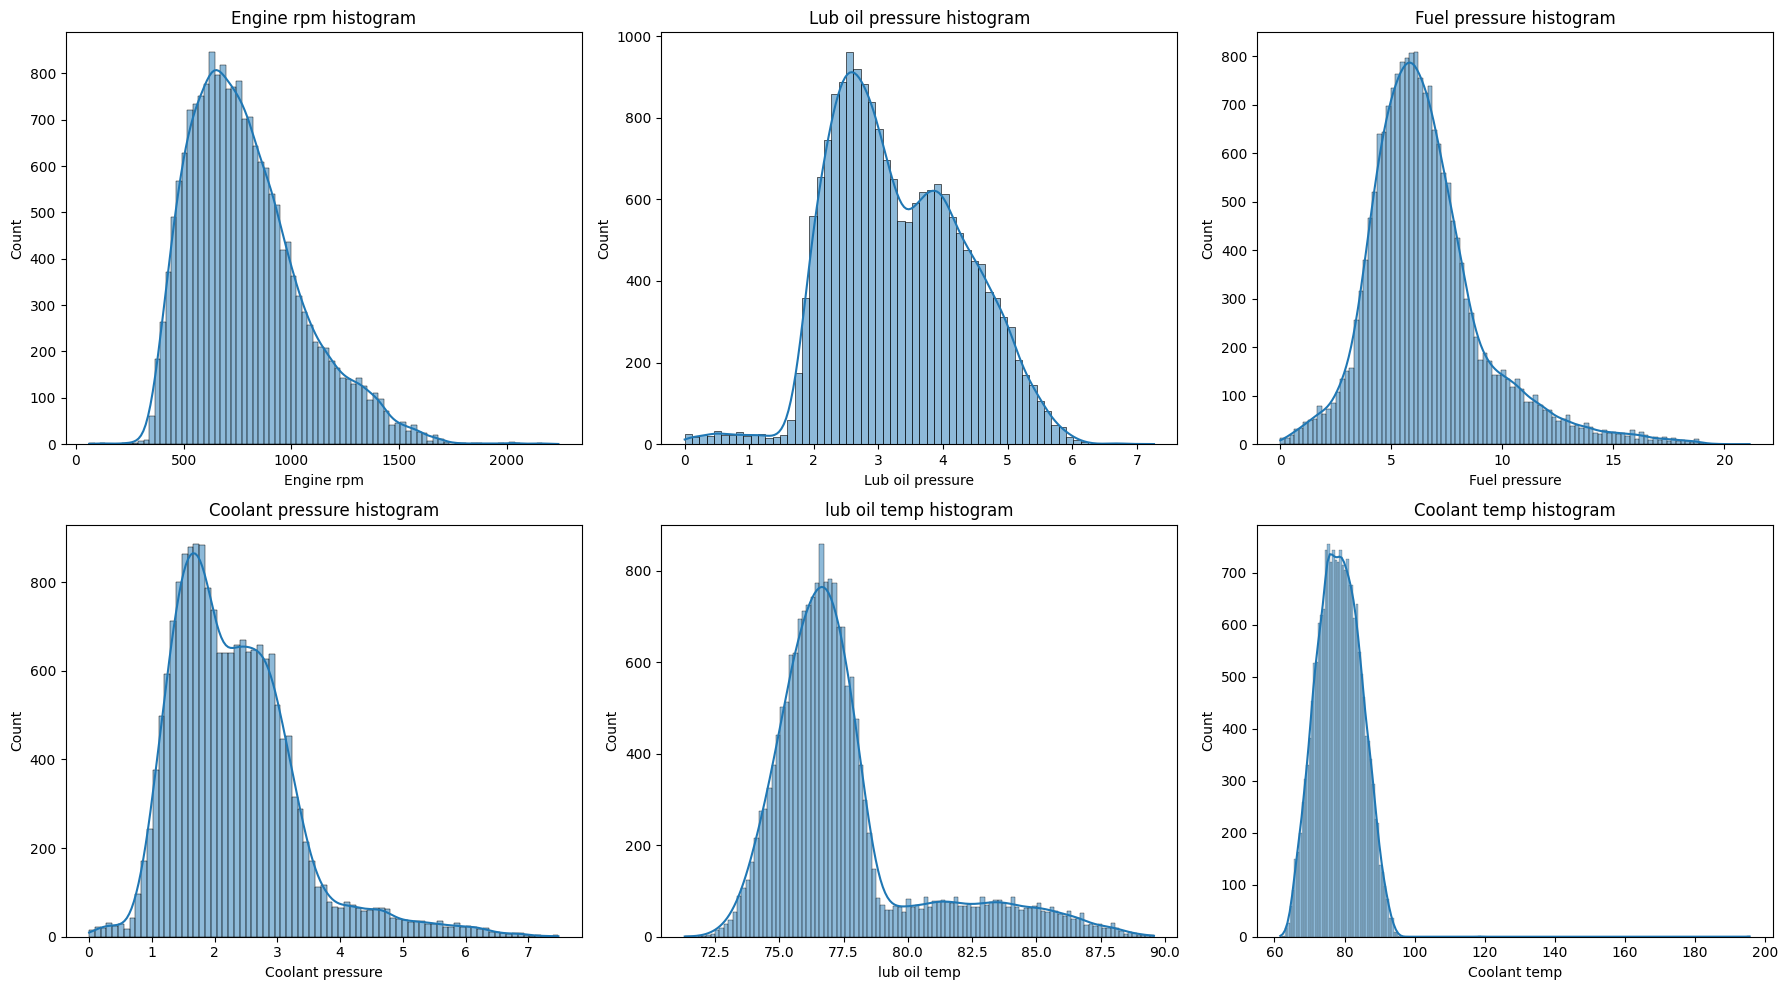

In [25]:
plot_histograms(iqr_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

The plots suggest that, despite identifying a decent ratio of anomalies within the data -- 422 anomalies from 19,535 observations --, the method could not effectively flag many additional outliers within the data. A considerable amount of outliers is still visible after removing the anomalies identified by the IQR method, and the features distribution do not seem to have changed so much.

All of this lead us to conclude that IQR may not be the most effective method to detect the anomalies. ML-based models might be more suitable despite being less straighforward than this stiatistical method.

Finally, we store the observations for later comparison with the rest of the anomaly detection models. We will determine the number of anomalies that have been detected together by each pair of methods, assessing differences in their performance.

In [26]:
# Store the anomalies
iqr_anomalies = df_copy[df_copy['IQR anomaly'] == 1]

### 2.2. One-Class Suport Vector Machine (OCSVM)

Since the IQR method failed to identify many anomalies, ML-based methods can be evaluated to check whether they perform better.

The first model that we will compute is One-Class Suport Vector Machine -- OCSVM from now on. It is a classification model designed for anomaly detection which uses a hyperplane to identify whether an observation is an anomaly or a normal observation

The model is sensitive to scales, so the first step is to scale the data.

In [27]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the array to a data frame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491


Once the data is scaled, we can fit the model. The class `OneClassSVM` contains three parameters:

* `kernel`: Sets the kernel fucntion of the hyperplane. We will employ a nonlinear kernel, as it is more suitable for detecting the anomalies.
* `gamma`: Controls the influence of the data on the decision boundary. A higher value closely fit around the training data, being more sensitive to outliers, while a lower value leads the model to flag fewer anomalies.
* `nu`: Influences the model's sensitivity to outliers. The higher value, the more tolerance to outliers.

The model output indicates if the observation has been labelled as an anomaly (-1) or not (1). Thus, a new binary column will be added to the dataset flagging anomalies as '1' and normal observations as '0'. Different combinations between the parameters `gamma` and `nu` will be tried in order to maximize the model's performance - in this case, obtaining a percentage of anomalies between the 1% and 5% of total observations.


In [28]:
from sklearn.svm import OneClassSVM

def fit_OCSVM(df, gamma, nu):
  '''Fit a One-Class SVM model with the specified values of gamma and nu'''

  df_copy = df.copy()

  # Fit OCSVM model
  model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
  model.fit(df_copy)

  # Predict classes
  y_pred = model.predict(df_copy)

  # Check anomalies
  is_anomaly = y_pred==-1

  # Add binary column to the dataset
  df_copy['OCSVM anomaly'] = is_anomaly.astype(int)

  return df_copy, y_pred

#### 2.2.1. `gamma=0.5`, `nu=0.05`

We begin by setting `gamma=0.5` and `nu=0.05`. Then, we calculate the percentage of observations labelled as anomalies.

In [29]:
df_copy2, y_pred1 = fit_OCSVM(df_scaled, gamma=0.5, nu=0.05)
df_copy2.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,OCSVM anomaly
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0


In [30]:
# Calculate number of anomalies
num_anomalies = df_copy2['OCSVM anomaly'].sum()
print(num_anomalies)

1043


In [31]:
# Anomaly ratio
anomaly_ratio = num_anomalies / len(df)
print(f'{anomaly_ratio*100:.2f}%')

5.34%


The OCSVM model for `gamma=0.5` and `nu=0.05` identified the 5.34% of total observations as anomalies. This is slightly above the desired range, suggesting that additional combinations should be explored.



To visualise the model's output, we can apply PCA for dimensionality reduction and embed the data into two dimensions. This allows us to plot the data using a scatterplot.

First, we perform PCA

In [32]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the array to a data frame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-0.557362,-0.906512
1,-2.177170,-1.201538
2,2.051806,1.039581
3,0.744375,-0.501140
4,-1.629821,-0.473906


Now, we embed the data into two dimensions and plot it through the two principal components.

In [33]:
def plot_PCA(df, y_pred, title):
    '''Visualize the One-Class SVM model output after performing PCA'''

    plt.figure(figsize=(10, 8))

    # Define colors and labels
    labels = {1: 'Normal observations', -1: 'Anomaly'}
    colors = {1: 'deepskyblue', -1: 'red'}

    for label in [1, -1]:
      subset = df[y_pred == label]
      plt.scatter(subset.iloc[:, 0],
                subset.iloc[:, 1],
                c=colors[label],
                label=labels[label],
                alpha=0.5,
                edgecolor='k')

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.title(title)
    plt.show()

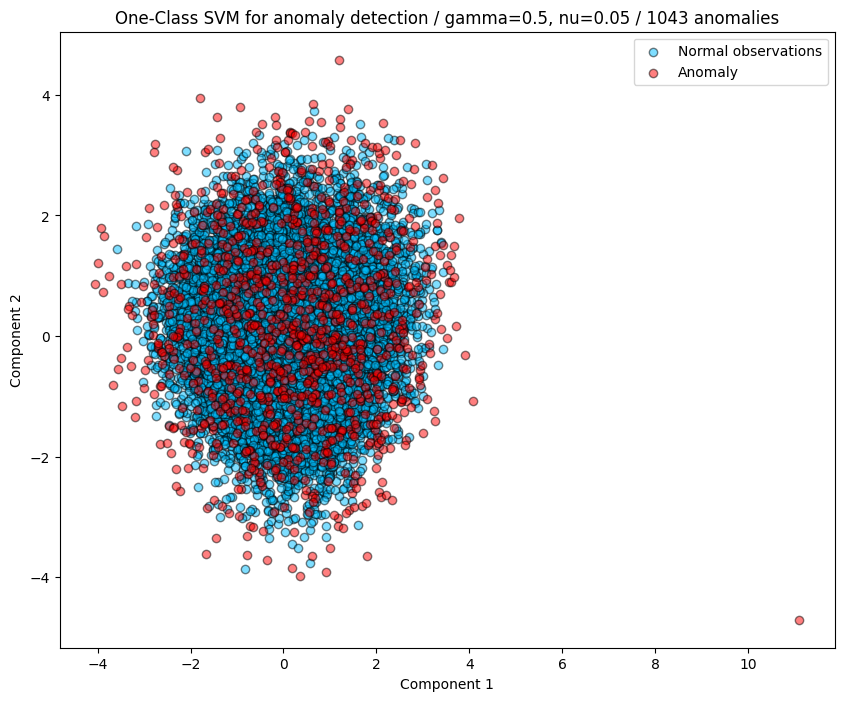

In [34]:
plot_PCA(df_pca, y_pred1, 'One-Class SVM for anomaly detection / gamma=0.5, nu=0.05 / 1043 anomalies')

There is no clear separation between the two observation categories, so no meaningful information can be extracted from the plot.

Finally, let's analyse the impact of the anomalies on the data. As we did with the IQR method, let's plot the boxplots and histograms for the normal observations identified by the OCSVM model, and determine if there is significant difference.

In [35]:
# Get normal observations
ocsvm1_normal_observations = df[df_copy2['OCSVM anomaly'] == 0]
print(ocsvm1_normal_observations.shape)

(18492, 6)


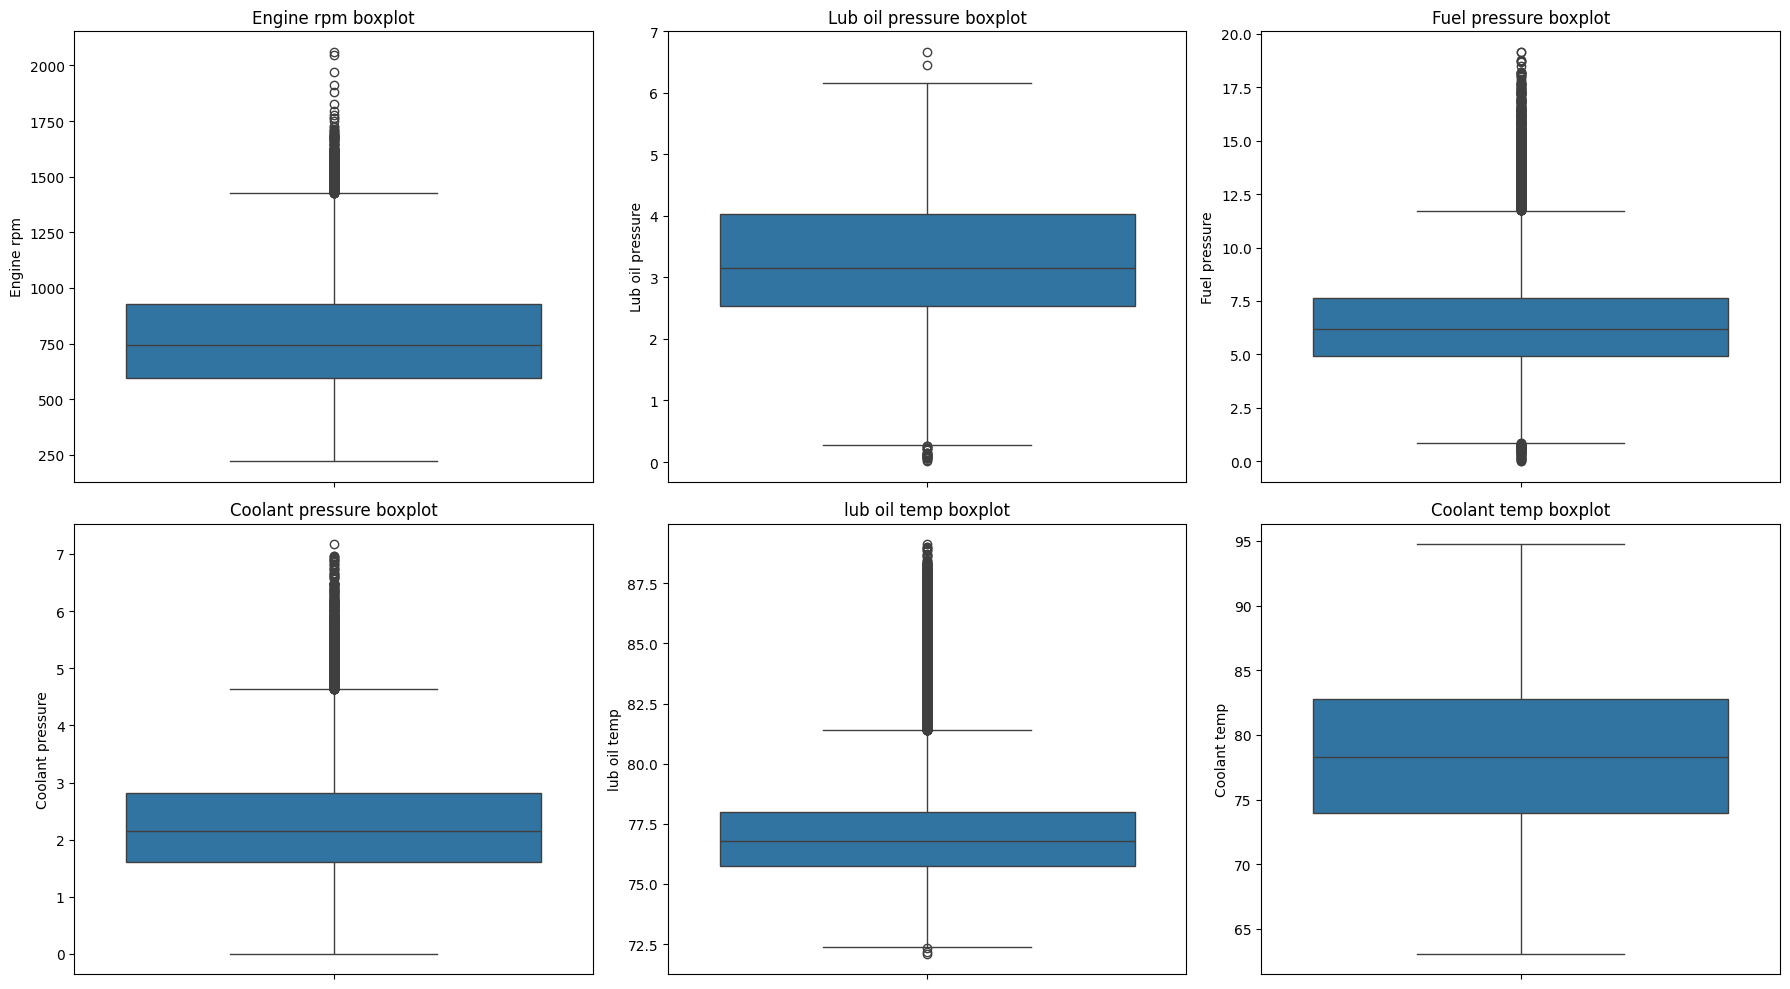

In [36]:
# Boxplots
plot_boxplots(ocsvm1_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

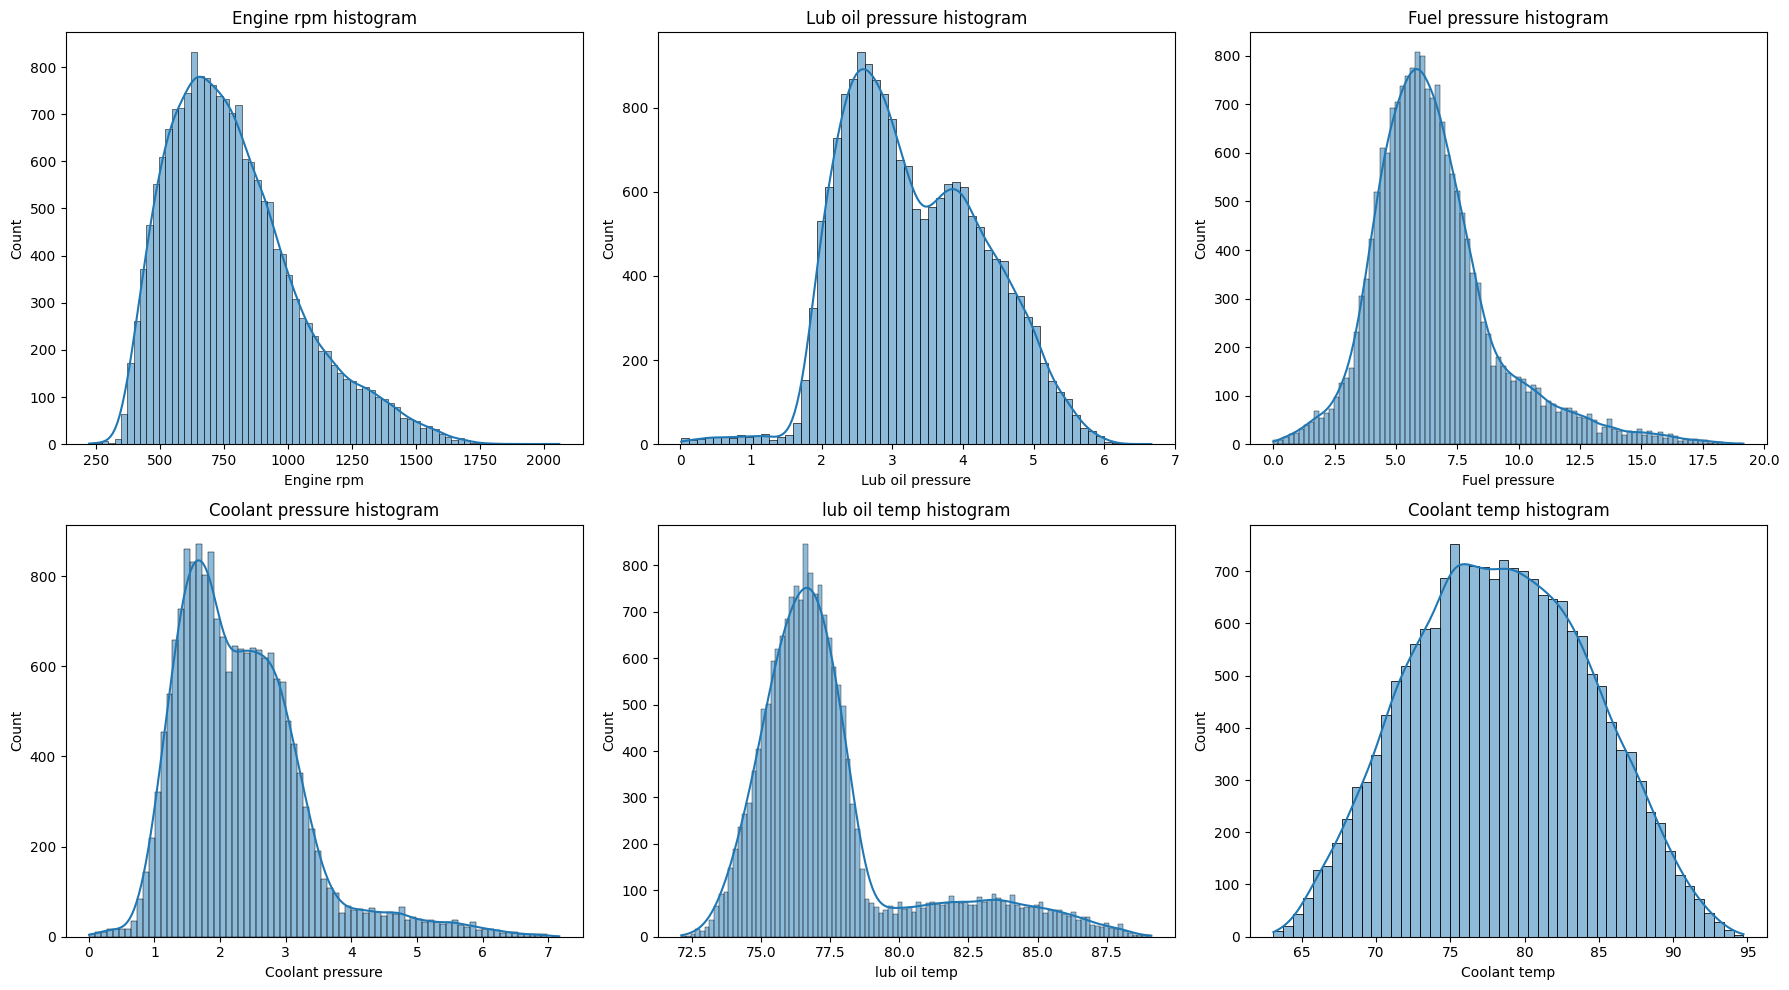

In [37]:
# Histograms
plot_histograms(ocsvm1_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

The plots revealed some significant insights. Unlike the previous method, OCSVM has effectvely identified a considerable amount of outliers in features like lubricant oil pressure and coolant temperature. In particular, the distribution of the latter has gone from being right-skewed with extreme values to apparently be normalli distributed

This proves that the One-Class SVM model performs better than the IQR method when identifying potential outliers.

#### 2.2.2. `gamma=0.5`, `nu=0.03`

By setting the parameters `gamma=0.5` and `nu=0.05`, the OCSVM model labelled the 5.34% of total observations as anomalies. Since we aim to obatin a percentage between 1% and 5%, we have to modify these parameters.

As previously mentioned, the parameter `nu` influences the model's tolerance to outliers. The larger the value is, the higher number of outliers the model will identify. Therefore, we can slightly reduce this parameter in order to fit a model less tolerant to outliers, for instance, we can set `nu=0.03`.

On the other hand, we should not considerably vary the parameter `gamma`. High values will make the model to overfit to the random patterns of the train set, leading to worse performance when testing the model with other data. By contrast, low values will make the model to not capture relevant petterns in the data, contributing little to the analysis. Therefore, we will keep using `gamma=0.5`.

Let's fit the model using these parameters.

In [38]:
df_copy3, y_pred2 = fit_OCSVM(df_scaled, gamma=0.5, nu=0.03)
df_copy3.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,OCSVM anomaly
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,0
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0


Now, let's calculate the percentage of anomalies.

In [39]:
# Calculate number of anomalies
num_anomalies = df_copy3['OCSVM anomaly'].sum()
print(num_anomalies)

737


In [40]:
# Anomaly ratio
anomaly_ratio = num_anomalies / len(df)
print(f'{anomaly_ratio*100:.2f}%')

3.77%


As we expected, by reducing the value of `nu`, we have been able to reduce the percentage of anomalies to 3.77%, which is between the desired range.

Next, we can visualise the model's output by reducing the dimensions of the data set using PCA.

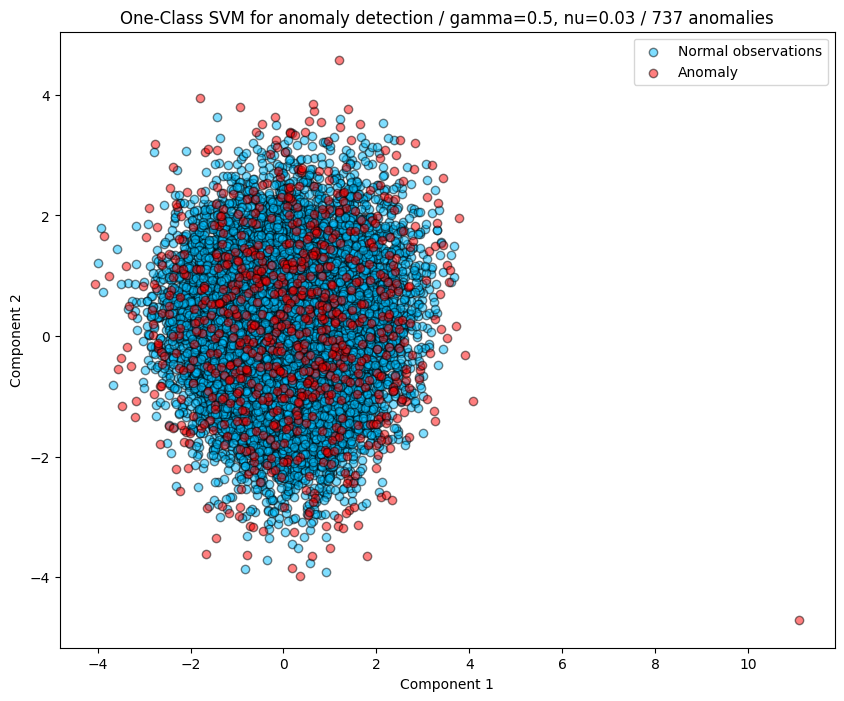

In [41]:
plot_PCA(df_pca, y_pred2, 'One-Class SVM for anomaly detection / gamma=0.5, nu=0.03 / 737 anomalies')

The plot is very similar to to previous one, but contains less observations flagged as anomalies.

Finally let's assess the impact of the identified anomalies on the distribution of the data. As we did before, let's determine the normal observations and plot their boxplots and histograms.

In [42]:
# Check normal observations
ocsvm2_normal_observations = df[df_copy3['OCSVM anomaly'] == 0]
print(ocsvm2_normal_observations.shape)

(18798, 6)


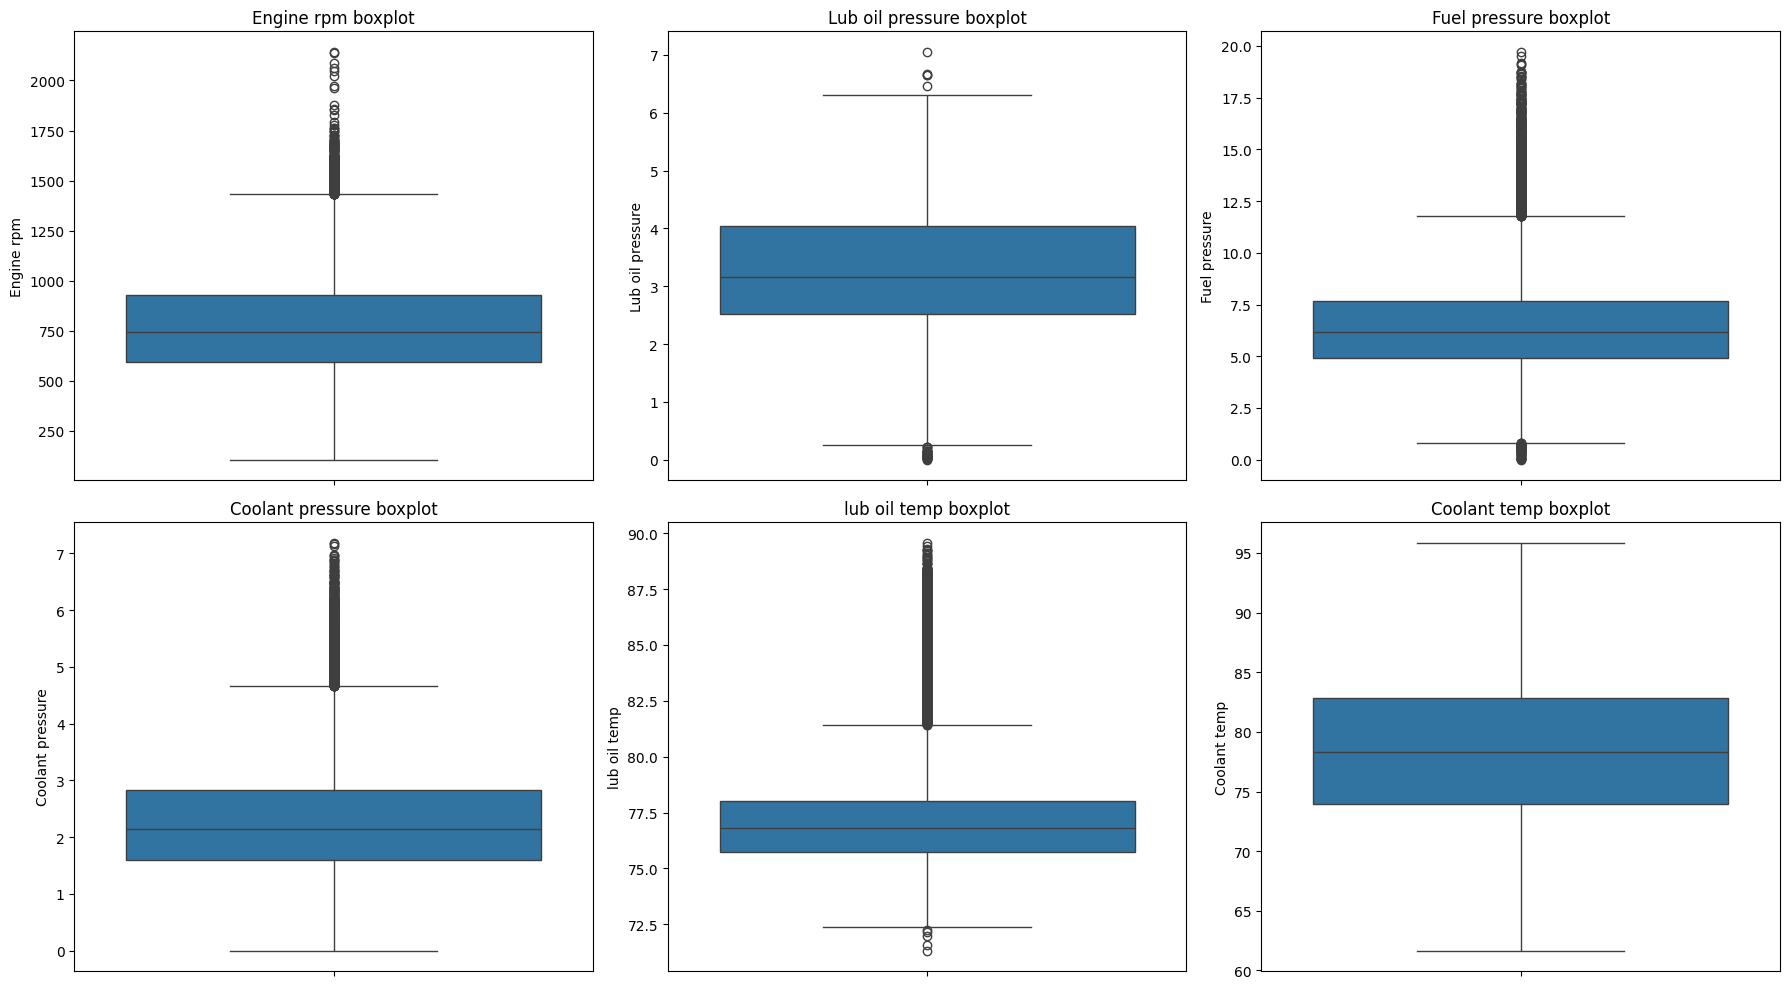

In [43]:
# Boxplots
plot_boxplots(ocsvm2_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

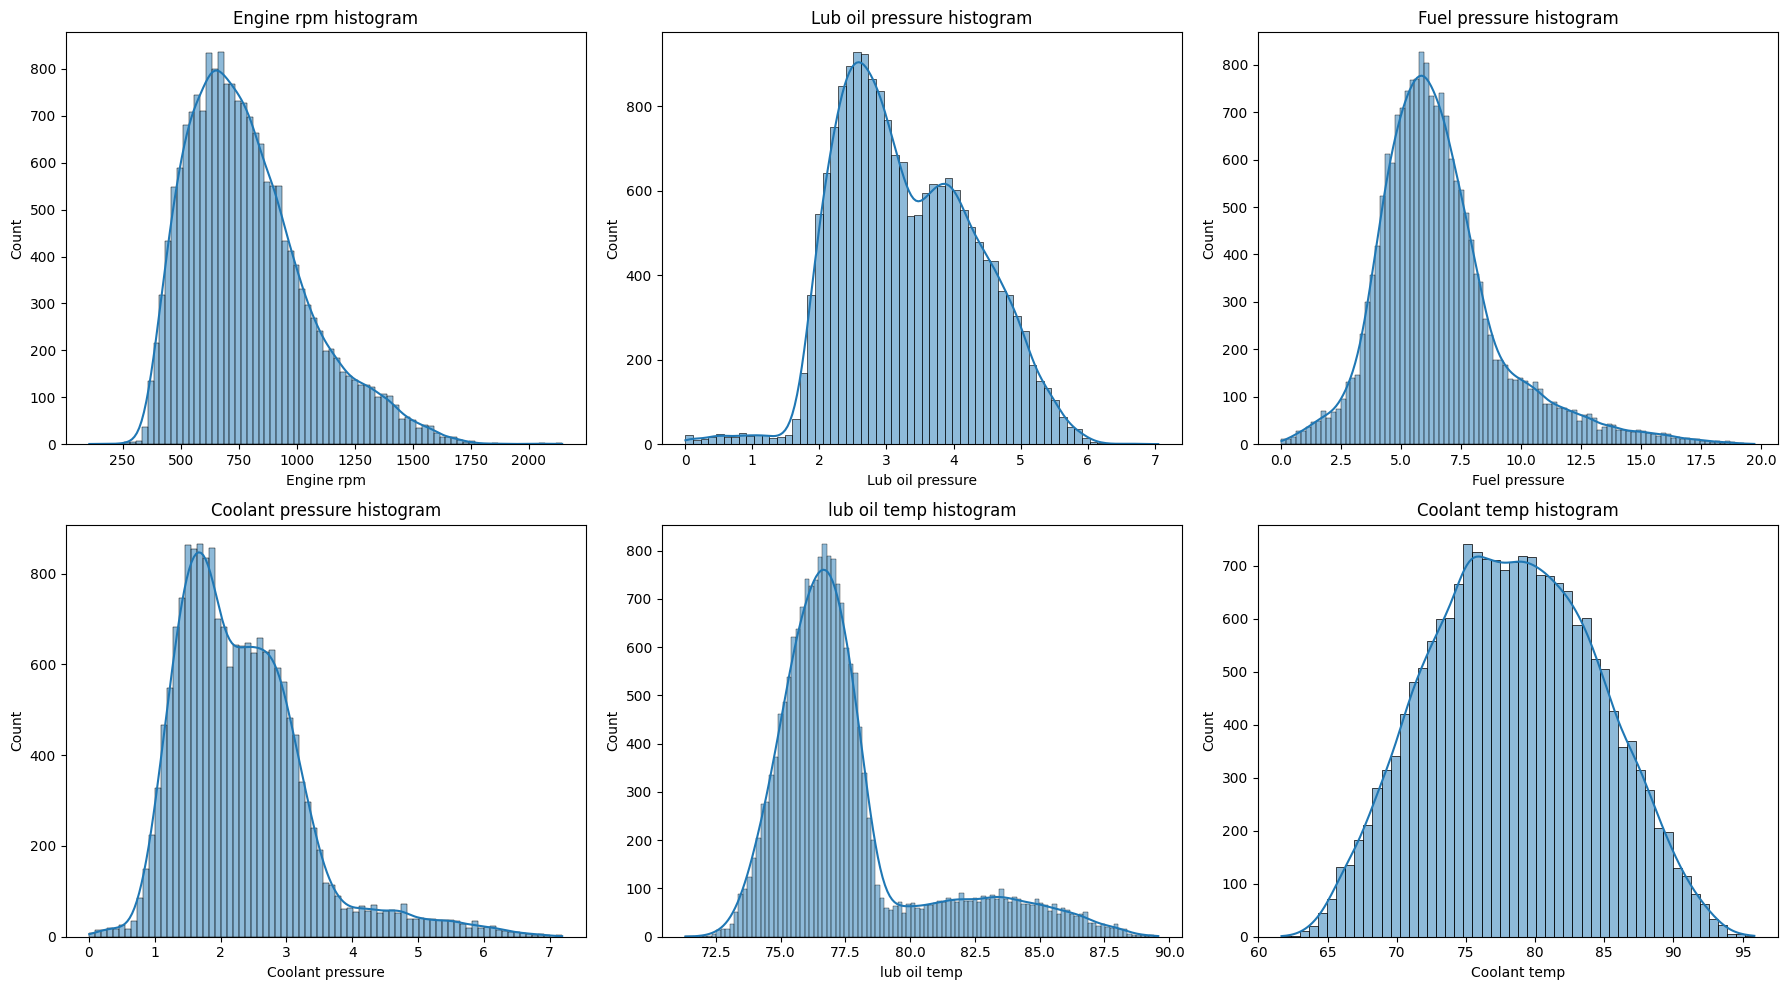

In [44]:
# Histograms
plot_histograms(ocsvm2_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

As expected, the results are very similar to the results of the previous OCSVM model. This model could also effectively identify the outliers of the coolant temperature feature, normalising its distribution.

Next, we store the anomalies.

In [45]:
ocsvm_anomalies2 = df_copy3[df_copy3['OCSVM anomaly'] == 1]

#### 2.2.3. `gamma=0.4`, `nu=0.04`

Finally, we can try to slightly vary `gamma` and assess the consequences. We will set `gamma=0.4`and `nu=0.04`.

Let`s fit the model and calculate the ratio of anomalies detected by the model.

In [46]:
df_copy4, y_pred3 = fit_OCSVM(df_scaled, gamma=0.4, nu=0.04)
df_copy4.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,OCSVM anomaly
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0


In [47]:
# Calculate number of anomalies
num_anomalies = df_copy4['OCSVM anomaly'].sum()
print(num_anomalies)

821


In [48]:
# Anomaly ratio
anomaly_ratio = num_anomalies / len(df)
print(f'{anomaly_ratio*100:.2f}%')

4.20%


The model increase the ratio of detected anomalies to 4.20%. We can now assess whether there are significant differences when visualising the data or in the distribution of the normal observations.

We begin by visualising the data after performing dimensionality reduction using PCA.

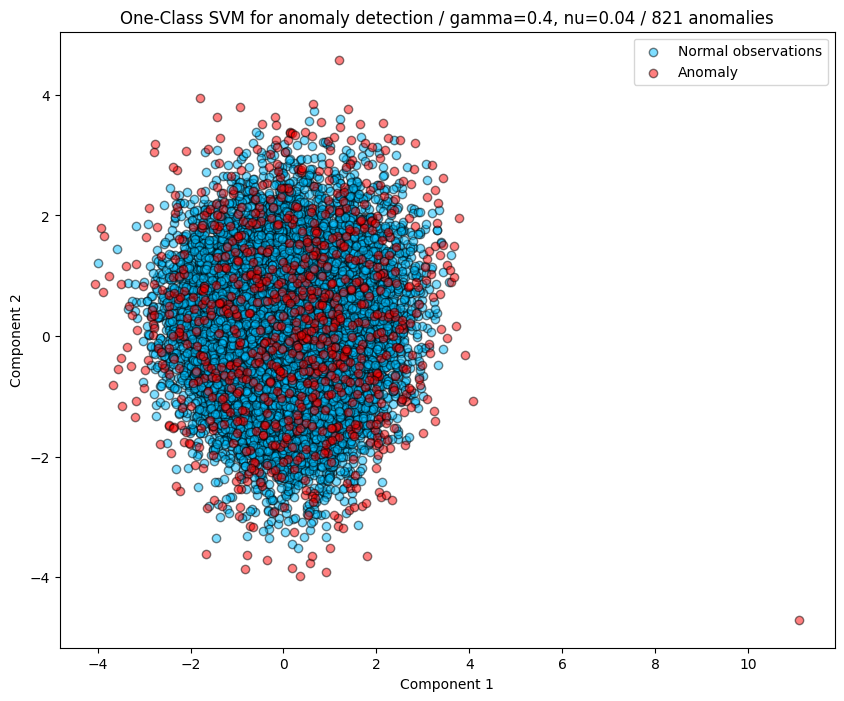

In [49]:
plot_PCA(df_pca, y_pred3, 'One-Class SVM for anomaly detection / gamma=0.4, nu=0.04 / 821 anomalies')

There is no significant difference with the previous plots.

Now, we plot the boxplots and histograms to explore the distributions of normal observations.

In [50]:
# Check normal observations
ocsvm3_normal_observations = df[df_copy4['OCSVM anomaly'] == 0]
print(ocsvm3_normal_observations.shape)

(18714, 6)


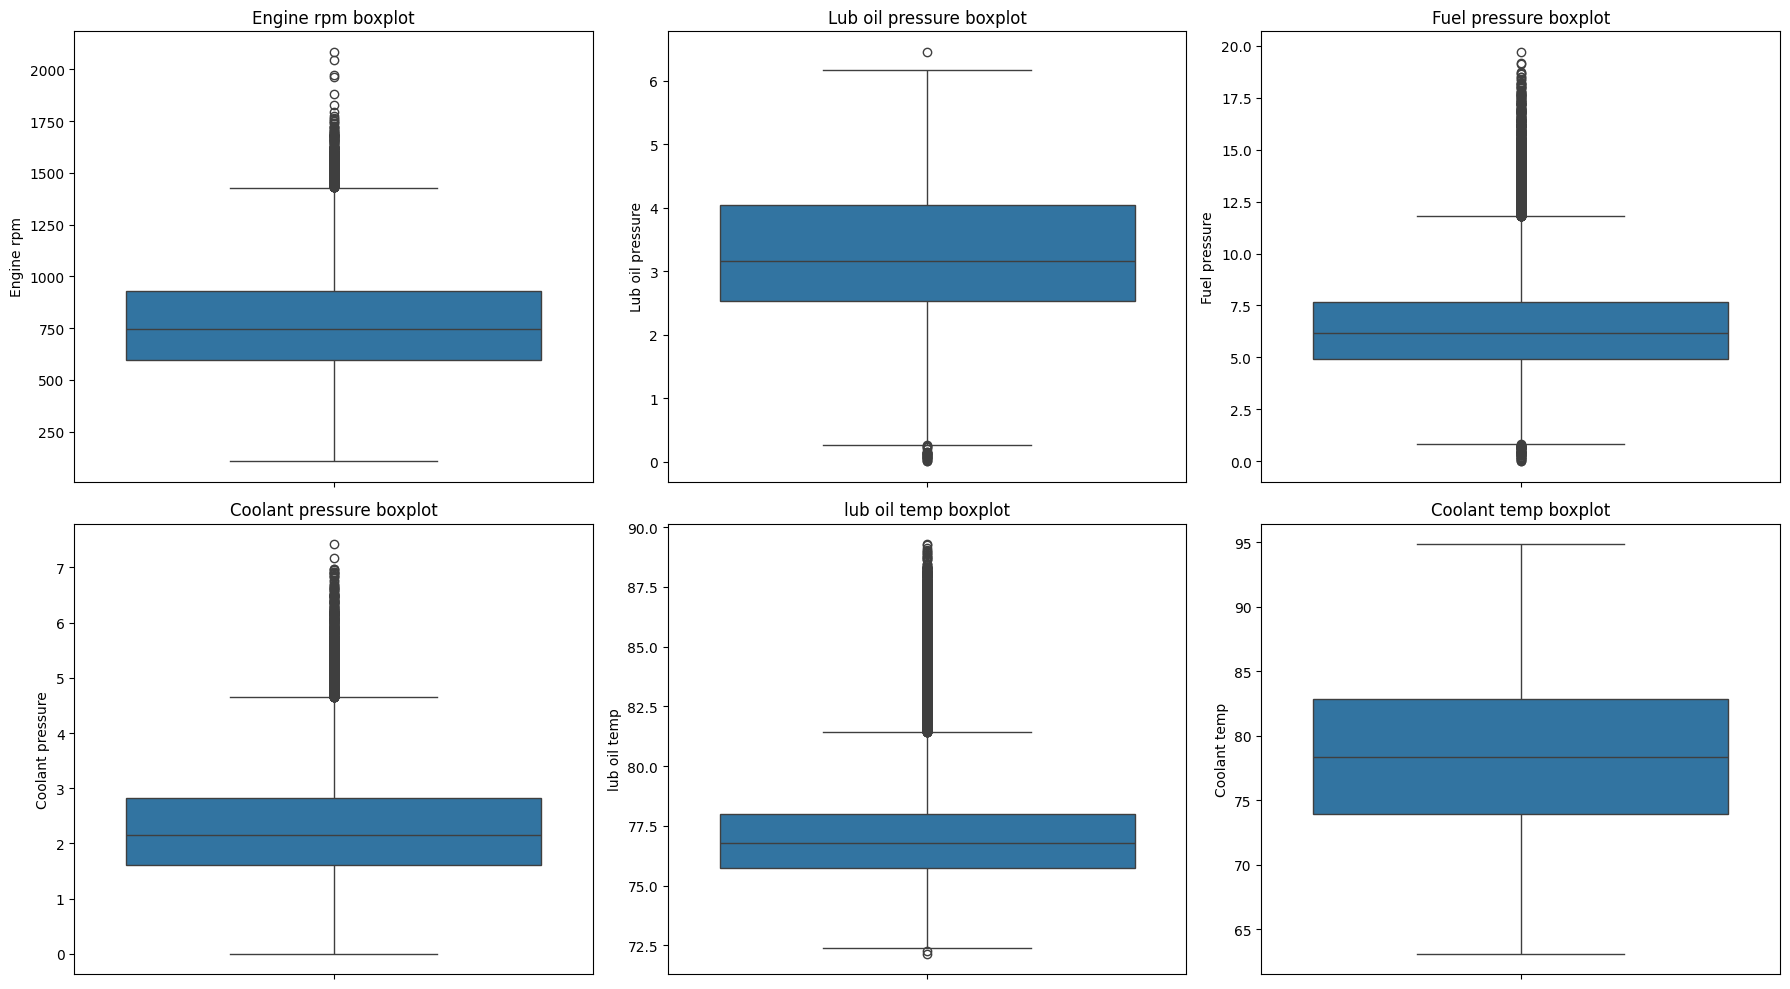

In [51]:
# Boxplots
plot_boxplots(ocsvm3_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

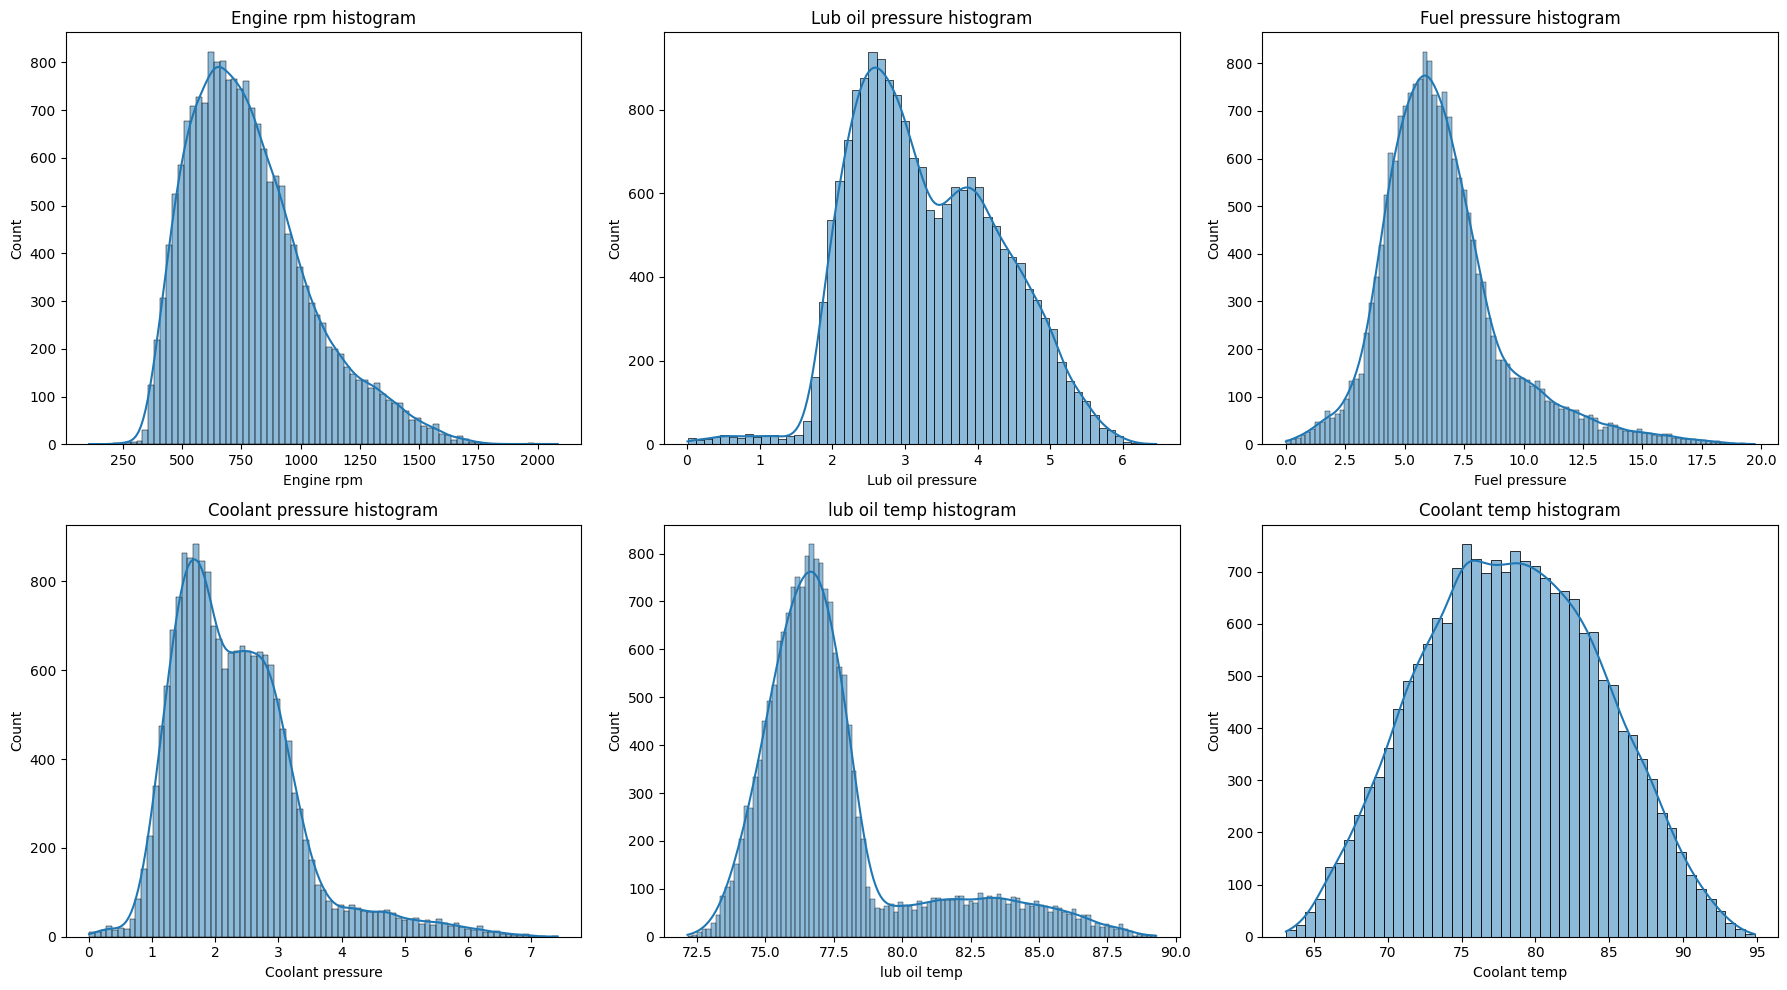

In [52]:
# Histograms
plot_histograms(ocsvm3_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

Again, the results are somewhat identical to the previous model's results. This indicates that there is no difference when varying the values of `gamma` and `nu` as long as the value of `nu` is below 0.05, as higher values result in a percentage of anomalies detected above 5% and does not impact the distribution of the feature 'Coolant temperature'.

#### 2.2.4 Anomaly ratio evolution (nu tuning)

After performing a few models, we have noticed that there is significant difference when reducing the value of `nu` below 0.05, but, from this threshold, the models seem to give similar results.

Therefore, we can assess the variation in the ratio of anomalies for different values of `nu`, from 0 to 0.1. To fairly compare the results, we will set the value of `gamma` to 0.5.

In [53]:
# List of results
results = []

for nu in np.arange(0.01, 0.11, 0.01):
    # Fit OCSVM model
    nu_df, nu_y_pred = fit_OCSVM(df_scaled, gamma=0.5, nu=nu)

    # Calculate anomaly ratio
    num_anomalies = nu_df['OCSVM anomaly'].sum()
    anomaly_ratio = num_anomalies / len(df_scaled)

    # Append results
    results.append({'nu': nu, 'Anomaly %': round(anomaly_ratio*100, 2)})

# Create the DataFrame
anomaly_ratio_df = pd.DataFrame(results)
print(anomaly_ratio_df)

     nu  Anomaly %
0  0.01       3.13
1  0.02       3.21
2  0.03       3.77
3  0.04       4.39
4  0.05       5.34
5  0.06       6.23
6  0.07       7.19
7  0.08       8.16
8  0.09       9.16
9  0.10      10.16


We can visualise the results for a better understanding.

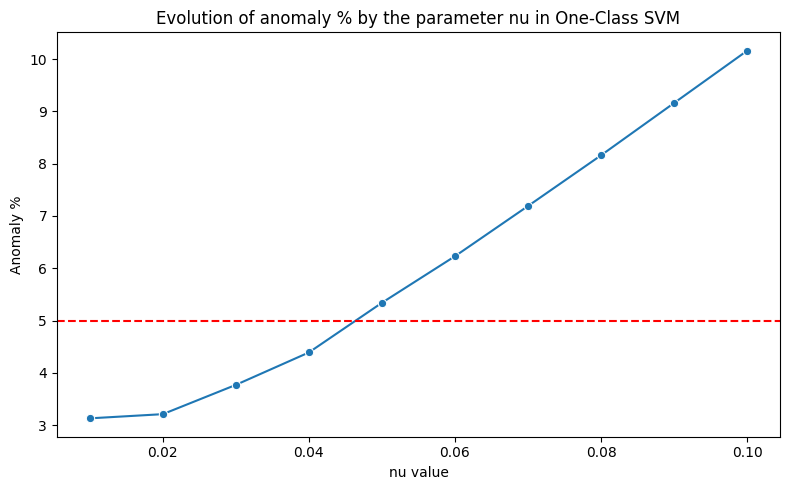

In [54]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=anomaly_ratio_df, x='nu', y='Anomaly %', marker='o')
plt.axhline(y=5, color='red', linestyle='--')
plt.title('Evolution of anomaly % by the parameter nu in One-Class SVM')
plt.xlabel('nu value')
plt.ylabel('Anomaly %')
plt.tight_layout()
plt.show()

As we can see, values of the parameter `nu` from 0.01 to 0.04 provide an anomaly percentage below the threshold of 5% .

* `nu=0.04` results in the highest percentage of anomalies detected with a 4.39%.
* For `nu=0.03`, the percentage decreases to a 3.77%.
* `nu=0.01` and `nu=0.02` provides a similar percentage: 3.13% and 3.21%, respectively.

From `nu=0.05` onwards, the anomalies percentage is above 5%, and its growth is almost linear. Since we aim to obtain a percentage below 5%, they may not be suitable approaches.

As we did with the IQR method, we will store the observations flagged as anomalies to compare the similarities in each method. We choose a One-Class SVM model for the parameters `gamma=0.5` and `nu=0.04`.

Let's fit the model and store the anomalies

In [55]:
# Fit the model
df_copy5, y_pred4 = fit_OCSVM(df_scaled, gamma=0.5, nu=0.04)

# Store the anomalies
ocsvm_anomalies = df_copy5[df_copy5['OCSVM anomaly'] == 1]

### 2.3. Isolation Forest (IF)

The final ML-based anomaly detection model that we will evaluate is Isolation Forest. This is an unsupervised ML model that directly identifies anomalies without needing to define normal observations.

The algorithm is mainly defined by two parameters:

* `n_estimators`: number of trees in the forest. The larger number, the more stable results the model will provide.
* `contamination`: number from 0 to 1 that represents the expected anomaly ratio within the data.

We will therefore explore different approaches using different combinations of these two parameters, and compare their results. One important characteristic of the model is that it is robust to features scales, so there is no need to scale the data.

#### 2.3.1. `n_estimators=100`, `contamination=0.05`

First, we will run an Isolation Forest model containing 100 trees with a expected anomaly ratio of 5%.

In [56]:
from sklearn.ensemble import IsolationForest

def fit_IF(df, n_estimators, contamination):
  '''Fit an Isolation Forest model with the specified values of n_estimators
   and contamination'''

  df_copy = df.copy()

  # Fit OCSVM model
  model = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
  model.fit(df_copy)

  # Predict classes
  y_pred = model.predict(df_copy)

  # Check anomalies
  is_anomaly = y_pred==-1

  # Add binary column to the dataset
  df_copy['IF anomaly'] = is_anomaly.astype(int)

  return df_copy, y_pred

In [57]:
# Fit model
df_copy6, y_pred5 = fit_IF(df_scaled, n_estimators=100, contamination=0.05)
df_copy6.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,IF anomaly
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0


Since the contamination parameter has been set to 0.05, the percentage of anomalies detected should be 5%. Let`s confirm it.

In [58]:
# Calculate number of anomalies
if_num_anomalies = df_copy6['IF anomaly'].sum()
print(if_num_anomalies)

977


In [59]:
# Anomaly ratio
if_anomaly_ratio = if_num_anomalies / len(df)
print(f'{if_anomaly_ratio*100:.2f}%')

5.00%


The percentage is as expected. We can also visualise the distribution of the data after applying dimensionality reduction using PCA, and compare the results to the One-Class SVM models.

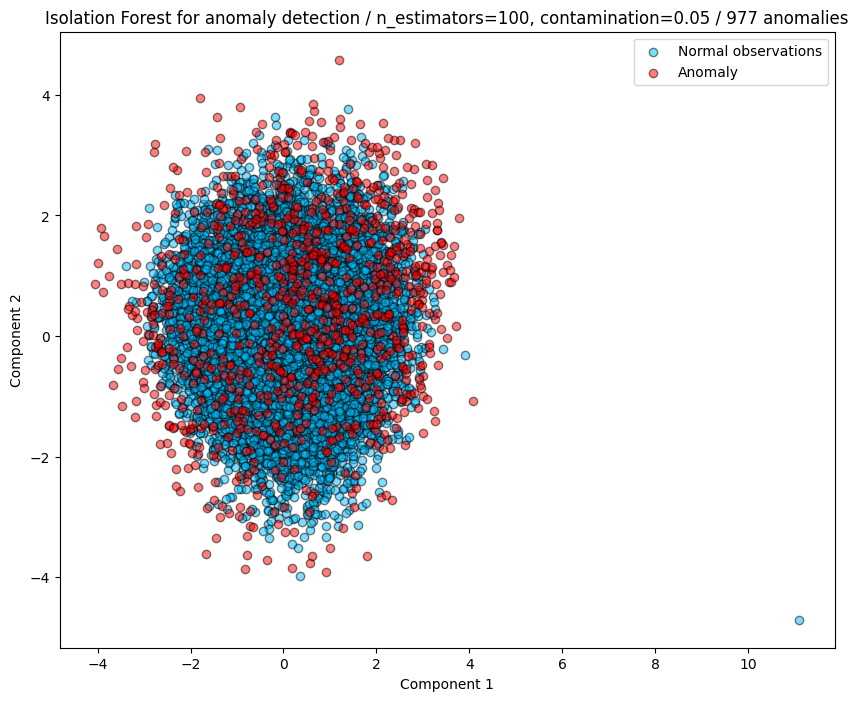

In [60]:
plot_PCA(df_pca, y_pred5, 'Isolation Forest for anomaly detection / n_estimators=100, contamination=0.05 / 977 anomalies')

The distribution of the observations is similar to the One-Class SVM models. In this case, observations located on the contour are somewhat more likely to be falgged as anomalies.

One interesting detail is that the extreme observation at the bottom right corner has been flagged as a normal observation, while all the One-Class SVM models identified it as an anomaly. We can further explore on it to assess whether the distribution is actually an anomaly or not.

First, we identify the observation in the PCA components coordinates.

In [61]:
extreme_observation = df_pca[df_pca['PC1'] > 10]
extreme_observation

,PC1,PC2
10663,11.10181,-4.705312


Since PCA does not modify the indexes of the data points, the values of this observation in the original features will correspond to the values of the 10,664th row -- the index 10,663 -- in the original data set.

In [62]:
original_extreme_observation = df.iloc[10663]
original_extreme_observation

,10663
Engine rpm,455.000000
Lub oil pressure,2.010802
Fuel pressure,7.806127
Coolant pressure,1.619575
lub oil temp,76.519385
Coolant temp,195.527912


Let's compute again the statistics sumary of the original data set and compare it to the values of the observation.

In [63]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


If we look at the feature 'Coolant temperature', we can observe that the observation corresponds to the maximum value of this column, which was a potential anomaly according to the boxplots.

This indicates that the model failed to detect the anomalies of this feature, so it will not be normally distributed. We can confirm this by plotting the boxplots and histograms of the normal observations.

In [64]:
# Get normal observations
if_normal_observations = df[df_copy6['IF anomaly'] == 0]

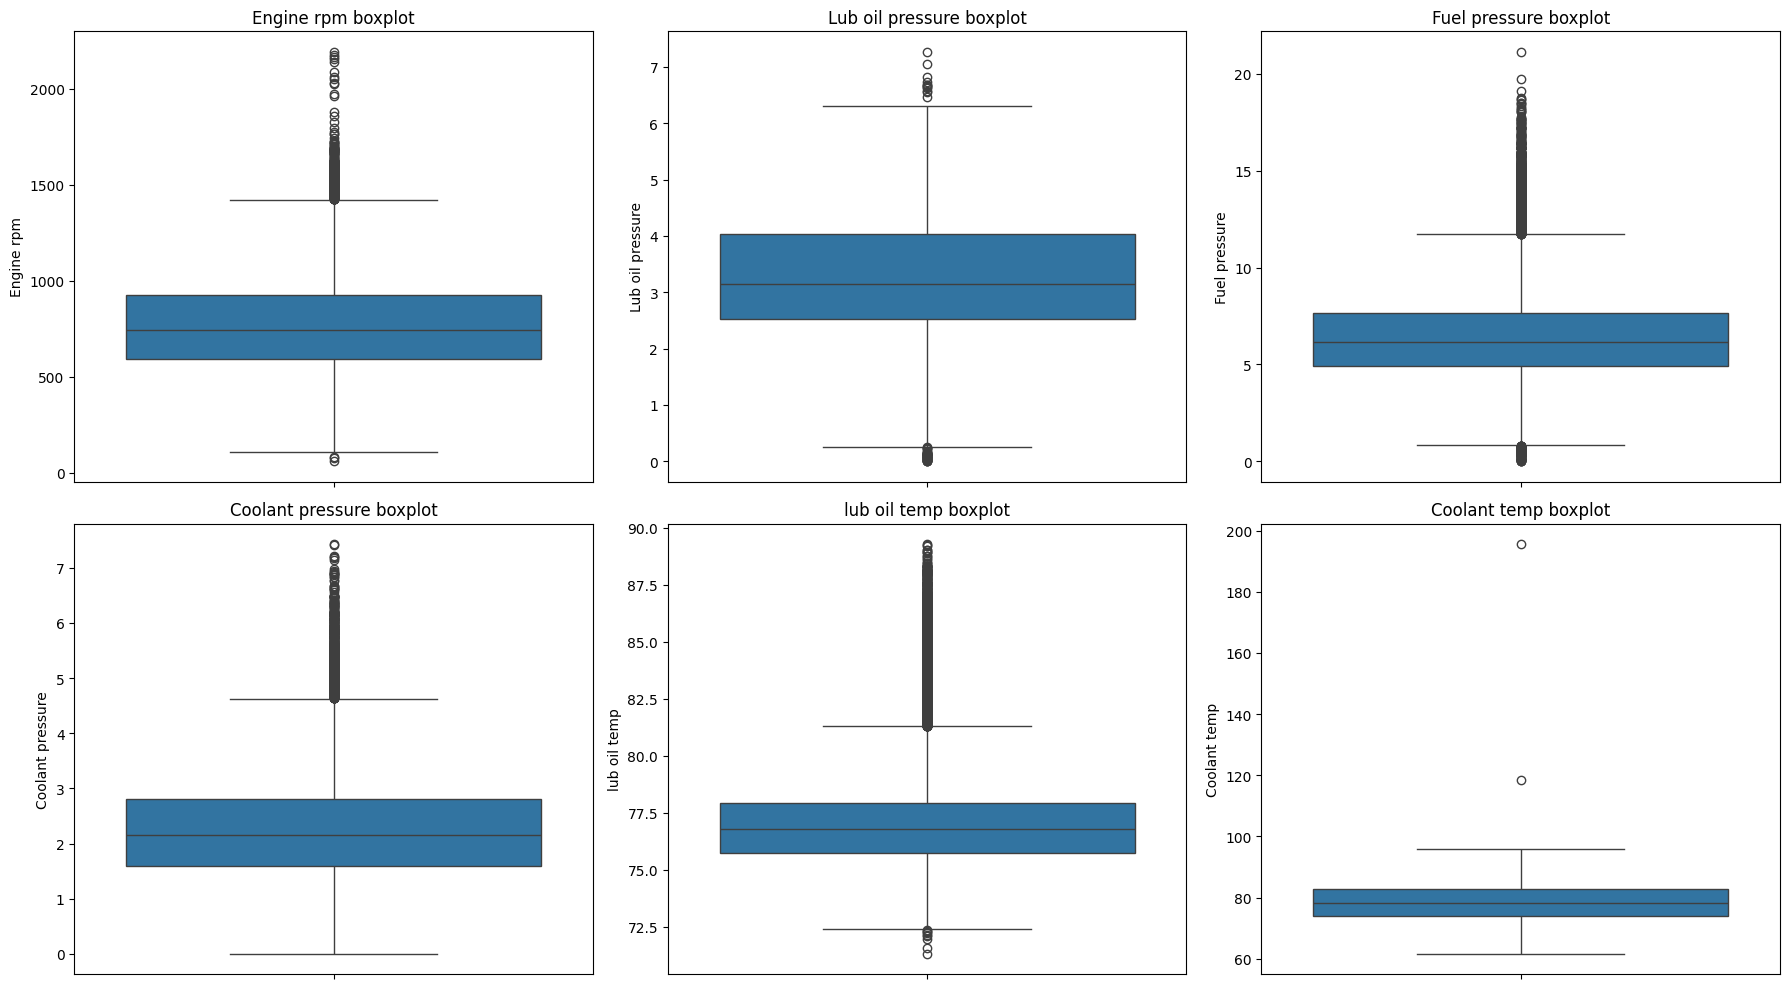

In [65]:
# Boxplots
plot_boxplots(if_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

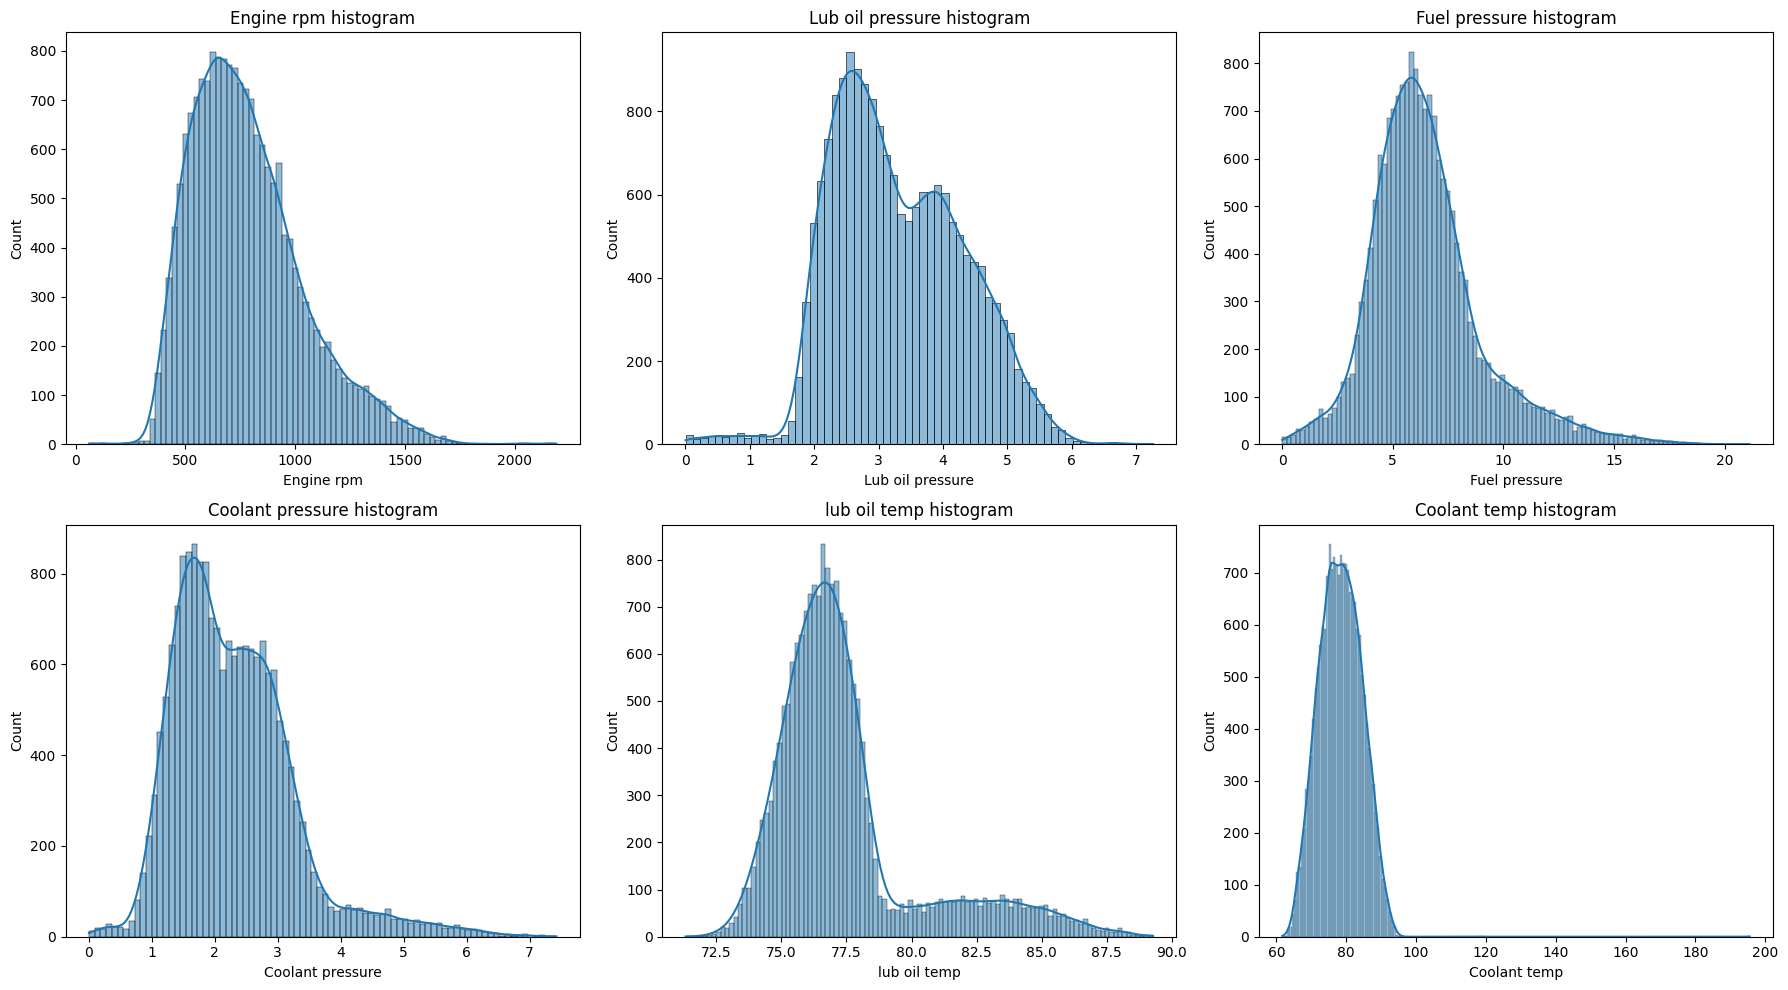

In [66]:
# Histograms
plot_histograms(if_normal_observations, figsize=(18, 10), n_rows=2, n_cols=3)

The plots confirm our suspicions. However, this do not necessarily indicate that the Isolation Forest model performs worse than the One-Class SVM models, as it might have detected anomalies in the rest of features that the One-Class SVM models failed to flag.

Finally, we store the anomalies for further exploration.

In [67]:
if_anomalies2 = df_copy6[df_copy6['IF anomaly'] == 1]

#### 2.3.2. `n_estimators=100`, `contamination=0.0439`

We can explore additional approaches by varying the parameters of the model. Let's fit an Isolation Forest model using `n_estimators=100` and `contamination=0.0439`. We choose this number to compare the subset of flagged anomalies with the results of the One-Class SVM model with `gamma=0.5`and `nu=0.04`. By selecting this contamination value, we expect to get a percentage of anomalies of 4.39%, the same as the One-Class SVM model.

In [68]:
# Fit Isolation Forest model
df_copy7, y_pred6 = fit_IF(df_scaled, n_estimators=100, contamination=0.0439)
df_copy7.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,IF anomaly
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0


In [69]:
# Number of anomalies
if_num_anomalies = df_copy7['IF anomaly'].sum()
print(if_num_anomalies)

858


In [70]:
# Anomaly ratio
if_anomaly_ratio = if_num_anomalies / len(df)
print(f'{if_anomaly_ratio*100:.2f}%')

4.39%


We now store the anomalies to later compare with the anomalies of the One-Class SVM approach.

In [71]:
# Store anomalies
if_anomalies = df_copy7[df_copy7['IF anomaly'] == 1]

## 3. Comparative analysis of models

Once that we have performed multiple approaches of the three different anomaly detection methods, we can evaluate the similarities and differences between them.

To do so, we can compare the methods in pairs, and calculate the number of observations that have simultaneously been flagged as anomalies by both.

We will compare three approaches, one per method. These will be:

* IQR method -- 422 (2.16%) anomalies detected.
* One-Class SVM with `gamma=0.5` and `nu=0.04` -- 858 (4.39%) anomalies detected.
* Isolation Forest with `n_estimators=100` and `contamination=0.0439` -- 858 (4.39%) anomalies detected.

Additionally, we will compare different approaches using the same models. By doing so, we can evaluate whether varying the model parameters has a significant impact on tyhe model performance.



### 3.1. IQR vs OCSVM

First, we compare the IQR method and the One-Class SVM model.

In [72]:
# Get the indexes of the intersection between the data frames
common_idx = iqr_anomalies.index.intersection(ocsvm_anomalies.index)

# Get the data points of the corresponding indexes
common_iqr_ocsvm = df.loc[common_idx]
common_iqr_ocsvm.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211
157,534,5.922045,18.044686,5.946436,77.292791,74.734372
249,1004,2.745963,16.554492,5.738463,74.621543,83.155235
260,1378,2.099323,5.522725,5.522853,84.682532,80.888281
315,802,4.716406,12.769046,1.376670,87.385264,75.863255


In [73]:
# Print dimensions of the data frame to get the number of rows
print(common_iqr_ocsvm.shape)

(191, 6)


Out of the 422 anomalies detected by the IQR method and the 858 anomalies by the One-Class SVM model, 191 are common. This represents the 45.26% of the anomalies flagged by the IQR method and the 22.26% of the anomalies flagged by the One-Class SVM model.

### 3.2. IQR vs IF


In [74]:
# Get the indexes of the intersection between the data frames
common_idx = iqr_anomalies.index.intersection(if_anomalies.index)

# Get the data points of the corresponding indexes
common_iqr_if = df.loc[common_idx]
common_iqr_if.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
131,830,3.231908,13.479172,2.568096,87.480362,73.428213
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211
157,534,5.922045,18.044686,5.946436,77.292791,74.734372
160,1546,3.903522,6.205256,5.554939,78.825641,73.677703
249,1004,2.745963,16.554492,5.738463,74.621543,83.155235


In [75]:
# Print dimensions of the data frame to get the number of rows
print(common_iqr_if.shape)

(266, 6)


In this case, the number of common anomalies increases to 266, which is the 63.03% of the anomalies flagged by IQR and the 31% of the anomalies flagged by Isolation Forest. This indicates that IQR and Isolation Forest performs more similarly than One-Class SVM.

### 3.3. OCSVM vs IF

In [76]:
# Get the indexes of the intersection between the data frames
common_idx = ocsvm_anomalies.index.intersection(if_anomalies.index)

# Get the data points of the corresponding indexes
common_ocsvm_if = df.loc[common_idx]
common_ocsvm_if.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
17,1312,5.963439,7.563578,5.931953,77.738876,88.661972
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211
157,534,5.922045,18.044686,5.946436,77.292791,74.734372
176,626,4.632698,9.455324,0.458069,86.205094,79.933331
249,1004,2.745963,16.554492,5.738463,74.621543,83.155235


In [77]:
# Print dimensions of the data frame to get the number of rows
print(common_ocsvm_if.shape)

(469, 6)


The One-Class SVm and Isolation Forest models detected 469 common anomalies. This is the 54.66% from the total 858 anomalies detected by both models.

### 3.4. IF: 4.39% vs 5% anomaly ratio

Finally, we can further explore into the Isolation Forest model. We now that the anomaly ratio of the model directly depends on the parameter `contamination`. If the parameter is set to 0.04, the model will detect the 4% of observations and anomalies, while if it is set to 0.05, the percentage will be 5%.

Then, we can assess whether any variation in the parameter will result in a variation in the anomalies detected, or if a model with an anomaly ratio of 5% will already detect the same anomalies as the model with 4% of anomaly ratio.

Let's compare the two approaches that we have previously explored: one model using `contamination=0.0439` and another model using `contamination=0.05`.

In [78]:
# Get the indexes of the intersection between the data frames
common_idx = if_anomalies.index.intersection(if_anomalies2.index)

# Get the data points of the corresponding indexes
common_if = df.loc[common_idx]
common_if.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
17,1312,5.963439,7.563578,5.931953,77.738876,88.661972
35,1374,2.543575,8.641020,1.541131,82.268575,66.810303
131,830,3.231908,13.479172,2.568096,87.480362,73.428213
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211


In [79]:
# Print dimensions of the data frame to get the number of rows
print(common_if.shape)

(858, 6)


The number of common anomalies is 858, which is the same number of anomalies flagged by the model with 4.39% of anomaly ratio.

This is valuable information, as we already know that the anomalies flagged by an Isolation Forest with a lower `contamination` value will be included in the set of anomalies detected by another model with higher `contamination` value.

### 3.5. OCSVM: 3.77% vs 4.39% anomaly ratio

We can do the same with the One-Class SVM models. Let's compare the models with `nu=0.03`and `nu=0.04`, which flagged 737 (3.77%) and 858 (4.39%) anomalies respectively.

In [80]:
# Get the indexes of the intersection between the data frames
common_idx = ocsvm_anomalies.index.intersection(ocsvm_anomalies2.index)

# Get the data points of the corresponding indexes
common_ocsvm = df.loc[common_idx]
common_ocsvm.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
9,806,3.946885,21.138326,1.572569,74.923316,72.112692
17,1312,5.963439,7.563578,5.931953,77.738876,88.661972
115,61,3.936641,8.088475,1.845086,77.227211,74.088200
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211
157,534,5.922045,18.044686,5.946436,77.292791,74.734372


In [81]:
# Print dimensions of the data frame to get the number of rows
print(common_ocsvm.shape)

(521, 6)


In this case, the number of common anomalies detected by both models is 521. This indicates that the anomalies detected by the model with `nu=0.03` are not fully  contained in the set of anomalies of the model for `nu=0.04`.

## 4 Conclusions

The results provide valuable information in order to select the most suitable approach. By increasing the parameter `contamination` in an Isolation Forest model, we will obtain a higher anomaly ratio, and these anomalies will also include the anomalies detected by models with a lower parameter. However, varying the parameter `nu` in One-Class SVM models significantly alters the detected anomalies, making more difficult to compare the effectiveness of the models.

In addition, there is one key detail. Each model detects a different number of anomalies, but this does not necessarily means that they are actually anomalies. There may be cases where a model flags one observation as an anomaly when it is not an anomaly. Therefore, it is mandatory to verify whether the anomalies detected by the models are actually anomalies or not.

To do so, we can provide the industry experts with a list of the anomalies flagged by each method so that they can confirm how many are anomalies and which are not. Then, we can determine the precision of each model of each model by using the following formula:

$$Precision = \frac{TP}{TP + FP}$$

where

* $TP$ =  True positives (number of actual anomalies).
* $FP$ = False positives (number of normal observations that have been flagged as anomalies by the model).

Once we have determined which observations are anomalies and which are not, we can make a trade-off between the anomaly ratio of each model and its precision. For example, it might be preferrable to consider a model with a 3.5% of anomaly ratio and a 85% of precision than a model with a 4.5% anomaly ratio but with a 70% precision.

As a result, we can effectively decide which model is the most relaibel without resulting in considerable losses for the company.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415.